# Generating data sets. SMOTE balansing. Skewness.
(time 35 minutes) 

### Content   <a name="content"></a>

1. [Load and analyse PubChem BioAssay G9a inhibitor data](#1)
2. [Creating of a data frame with CID, SID and targets](#2)
3. [Separate isomers from the basic data frame to deal with them separately](#3)
4. [Creating single-column lists of 1 and 0 targets for data extraction from PubChem](#4)
5. [Creating single-column lists of 1 and 0 targets for data extraction from PubChem for the isomers data set](#5)
6. [Adding PubChem computed properties of the compounds](#6)
7. [Adding PubChem computed properties of the isomers data set](#7)
8. [Adding variables based on the substance 2D coordinates ](#8)
9. [Adding variables based on the substance 2D coordinates of the isomers data set](#9)
10. [Adding hypothetical volumes based on the substances 2D coordinates](#10)
11. [Adding hypothetical volumes based on the substances 2D coordinates for the isomers data set](#11)
12. [Adding variables based on the compounds 3D coordinates](#12)
13. [Adding variables based on the compounds 3D coordinates for the isomers data set](#13)
14. [Adding hypothetical volumes based on the compounds 3D coordinates](#14)
15. [Adding hypothetical volumes based on the compounds 3D coordinates for the isomers data set](#15)
16. [Adding the relative proportion of the atoms of the compounds](#16)
17. [Adding the relative proportion of the atoms of the compounds for an isomers data set](#17)
18. [Adding the mass proportion of the atoms of the compounds](#18)
19. [Adding the mass proportion of the atoms of the compounds for the isomers data set](#19)
20. [Adding the relative sizes of molecules](#20)
21. [Adding the relative sizes of molecules for the isomers data set](#21)
22. [Adding similarity between the compounds based on their SMILES ](#22)
23. [Adding similarity between the compounds based on their SMILES for the isomers data set ](#23)
24. [Unite the compounds data frame with the isomers data frame](#24)
25. [Dealing with the negative valuses](#25)
26. [Creating of the CSV file without skewnes for the regression task](#26)
27. [Balansing data set with RandomUnderSampler ](#27)
28. [Creating the CSV files for the classification task](#28)

In [1]:
# pip install pandas
# pip install missingno
# pip install rdkit
# pip install chemformula
# pip install tables
# pip install imbalanced-learn

### Load and analyse PubChem BioAssay G9a inhibitor data <a name="1"></a>

In [2]:
import pandas as pd 

# load the BioAssay PubChem AID 504332 dataset
df_targets = pd.read_csv('pubchem_G9a.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of the data frame: ', df_targets.shape)
df_targets.head()

Shape of the data frame:  (353737, 44)


,PUBCHEM_RESULT_TAG,SID,CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Phenotype,Potency,Efficacy,Analysis Comment,Curve_Description,Fit_LogAC50,Fit_HillSlope,Fit_R2,Fit_InfiniteActivity,Fit_ZeroActivity,Fit_CurveClass,Excluded_Points,Max_Response,Activity at 0.00366 uM,Activity at 0.00865 uM,Activity at 0.018 uM,Activity at 0.041 uM,Activity at 0.092 uM,Activity at 0.133 uM,Activity at 0.202 uM,Activity at 0.415 uM,Activity at 0.501 uM,Activity at 0.843 uM,Activity at 1.264 uM,Activity at 2.335 uM,Activity at 3.417 uM,Activity at 5.146 uM,Activity at 10.61 uM,Activity at 12.70 uM,Activity at 21.52 uM,Activity at 31.98 uM,Activity at 58.95 uM,Activity at 101.6 uM,Activity at 134.7 uM,Activity at 186.0 uM,Compound QC
0,154378,57257240,135953404.0,C#CCOCCOCCOCCNC1=NC(=NC(=N1)N2CCN(CC2)C(=O)CN3...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8175,NaN,NaN,4.0834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
1,154349,57257238,135953403.0,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-9.2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1391,NaN,NaN,-9.2676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Elizabeth A Amin - Univ. of Minnesota ...
2,180795,57255498,135953402.0,CC[C@H](C)[C@@H](C(=O)N1CCN(CC1)C2=NC(=NC(=N2)...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-2.6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5227,NaN,NaN,-2.6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
3,180827,57255496,135953401.0,CC[C@H](C)[C@@H](C(=O)N1CCN(CC1)C2=NC(=NC(=N2)...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,8.8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0368,NaN,NaN,8.8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...
4,180868,57255491,135953400.0,CCCCC1=CN(N=N1)[C@@H](CCCC[NH3+])C(=O)N2CCN(CC...,Inactive,0,NaN,NaN,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,-2.1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5293,NaN,NaN,-2.1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QC'd by Kevin Burgess - Texas A and M Univ. - ...


In [3]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353737 entries, 0 to 353736
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PUBCHEM_RESULT_TAG             353737 non-null  int64  
 1   SID                            353737 non-null  int64  
 2   CID                            353732 non-null  float64
 3   PUBCHEM_EXT_DATASOURCE_SMILES  353732 non-null  object 
 4   PUBCHEM_ACTIVITY_OUTCOME       353737 non-null  object 
 5   PUBCHEM_ACTIVITY_SCORE         353737 non-null  int64  
 6   PUBCHEM_ACTIVITY_URL           0 non-null       float64
 7   PUBCHEM_ASSAYDATA_COMMENT      0 non-null       float64
 8   Phenotype                      353737 non-null  object 
 9   Potency                        91291 non-null   float64
 10  Efficacy                       91291 non-null   float64
 11  Analysis Comment               0 non-null       float64
 12  Curve_Description             

In [4]:
# Remove duplicates 
df_targets.drop_duplicates()
df_targets.shape  # 353737 means no duplicates

(353737, 44)

In [5]:
# Remove compounds with missing CID-s
df_targets = df_targets[df_targets['CID'].notna()]
df_targets.shape

(353732, 44)

In [6]:
# Remove compounds with missing SID-s
df_targets = df_targets[df_targets['SID'].notna()]
df_targets.shape

(353732, 44)

In [7]:
# Turn CID float data type into integer
df_targets['CID'] = df_targets['CID'].astype(int) 

<Axes: >

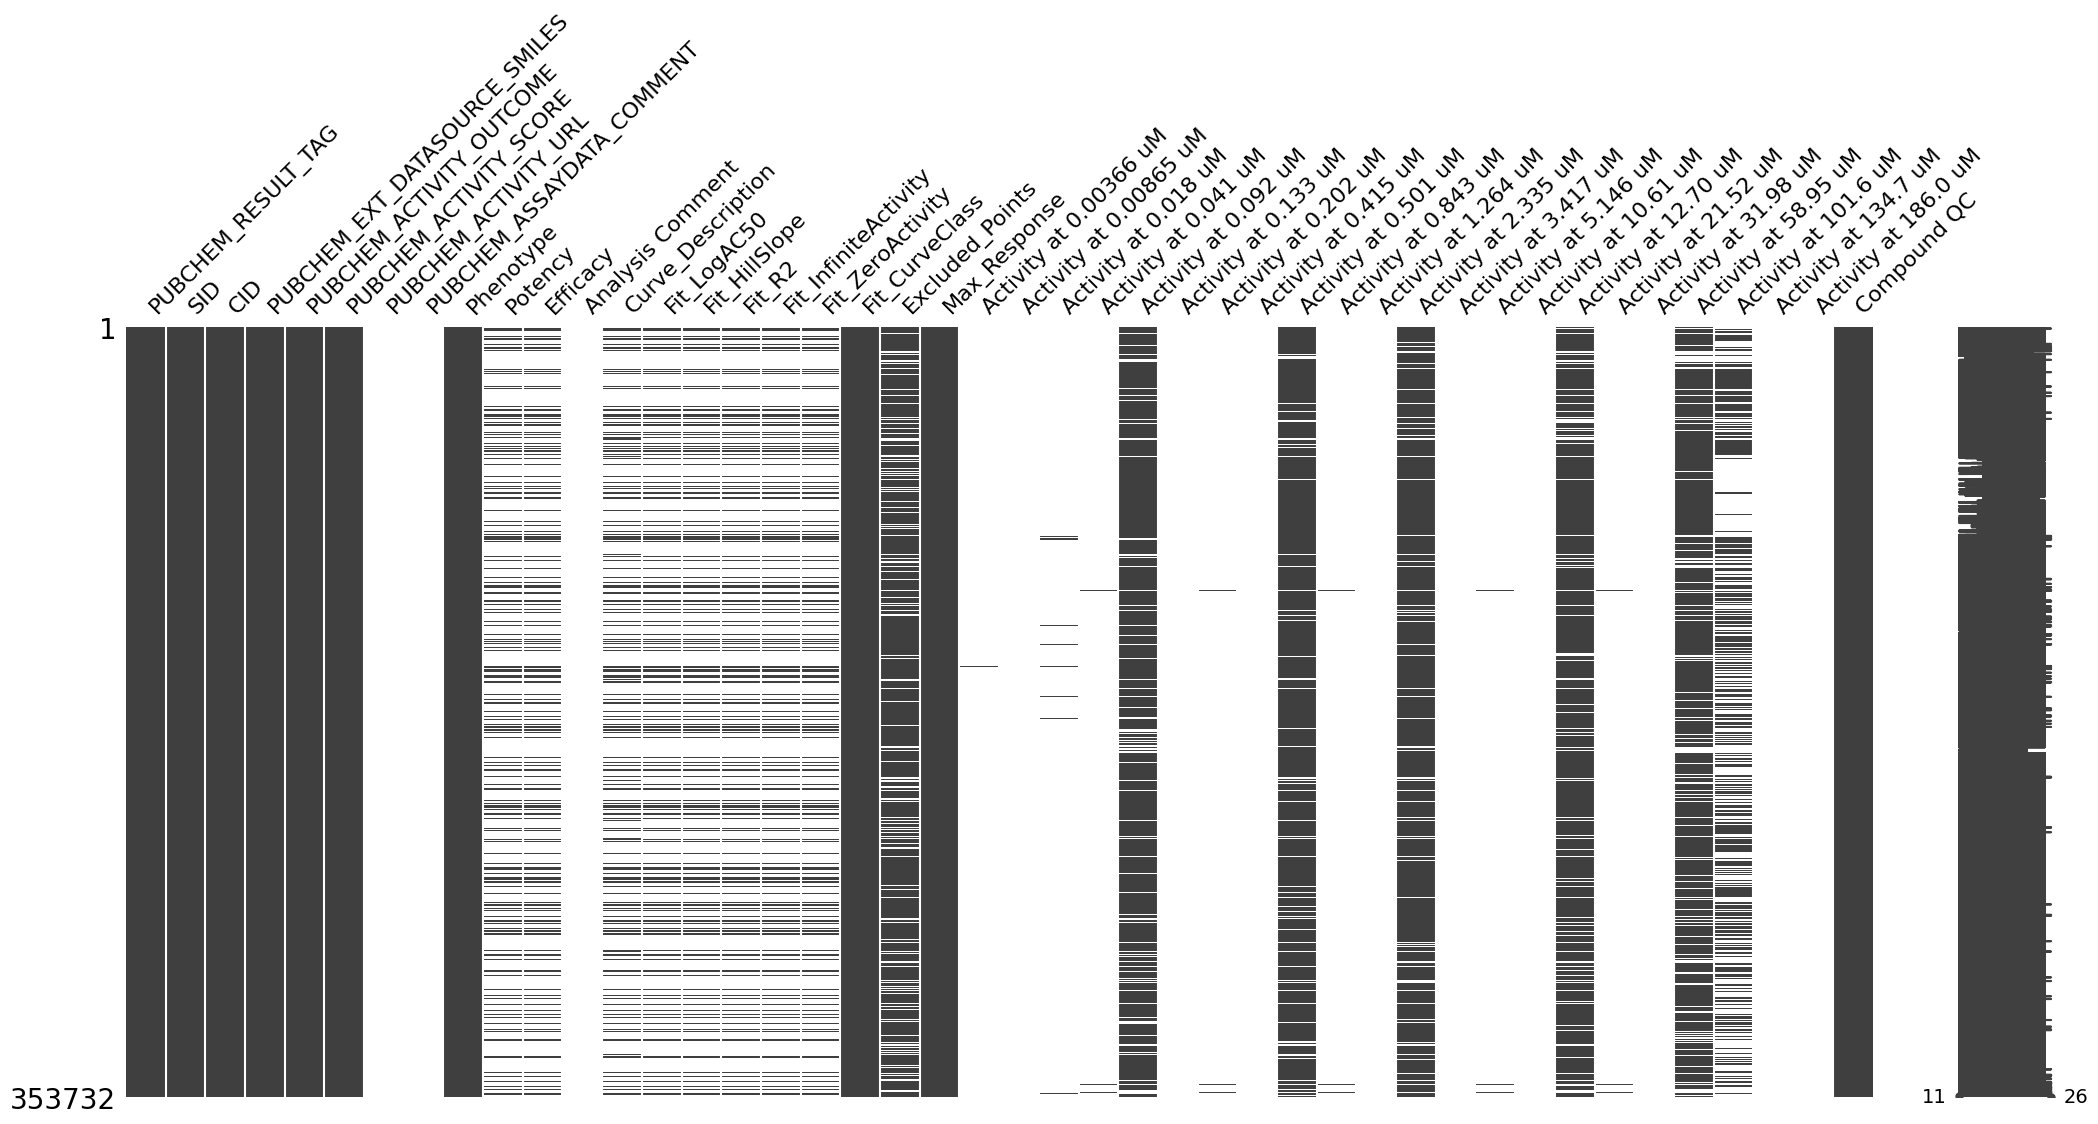

In [8]:
# Explore the data set visualising the missing values
import missingno as msno 
%matplotlib inline
msno.matrix(df_targets)

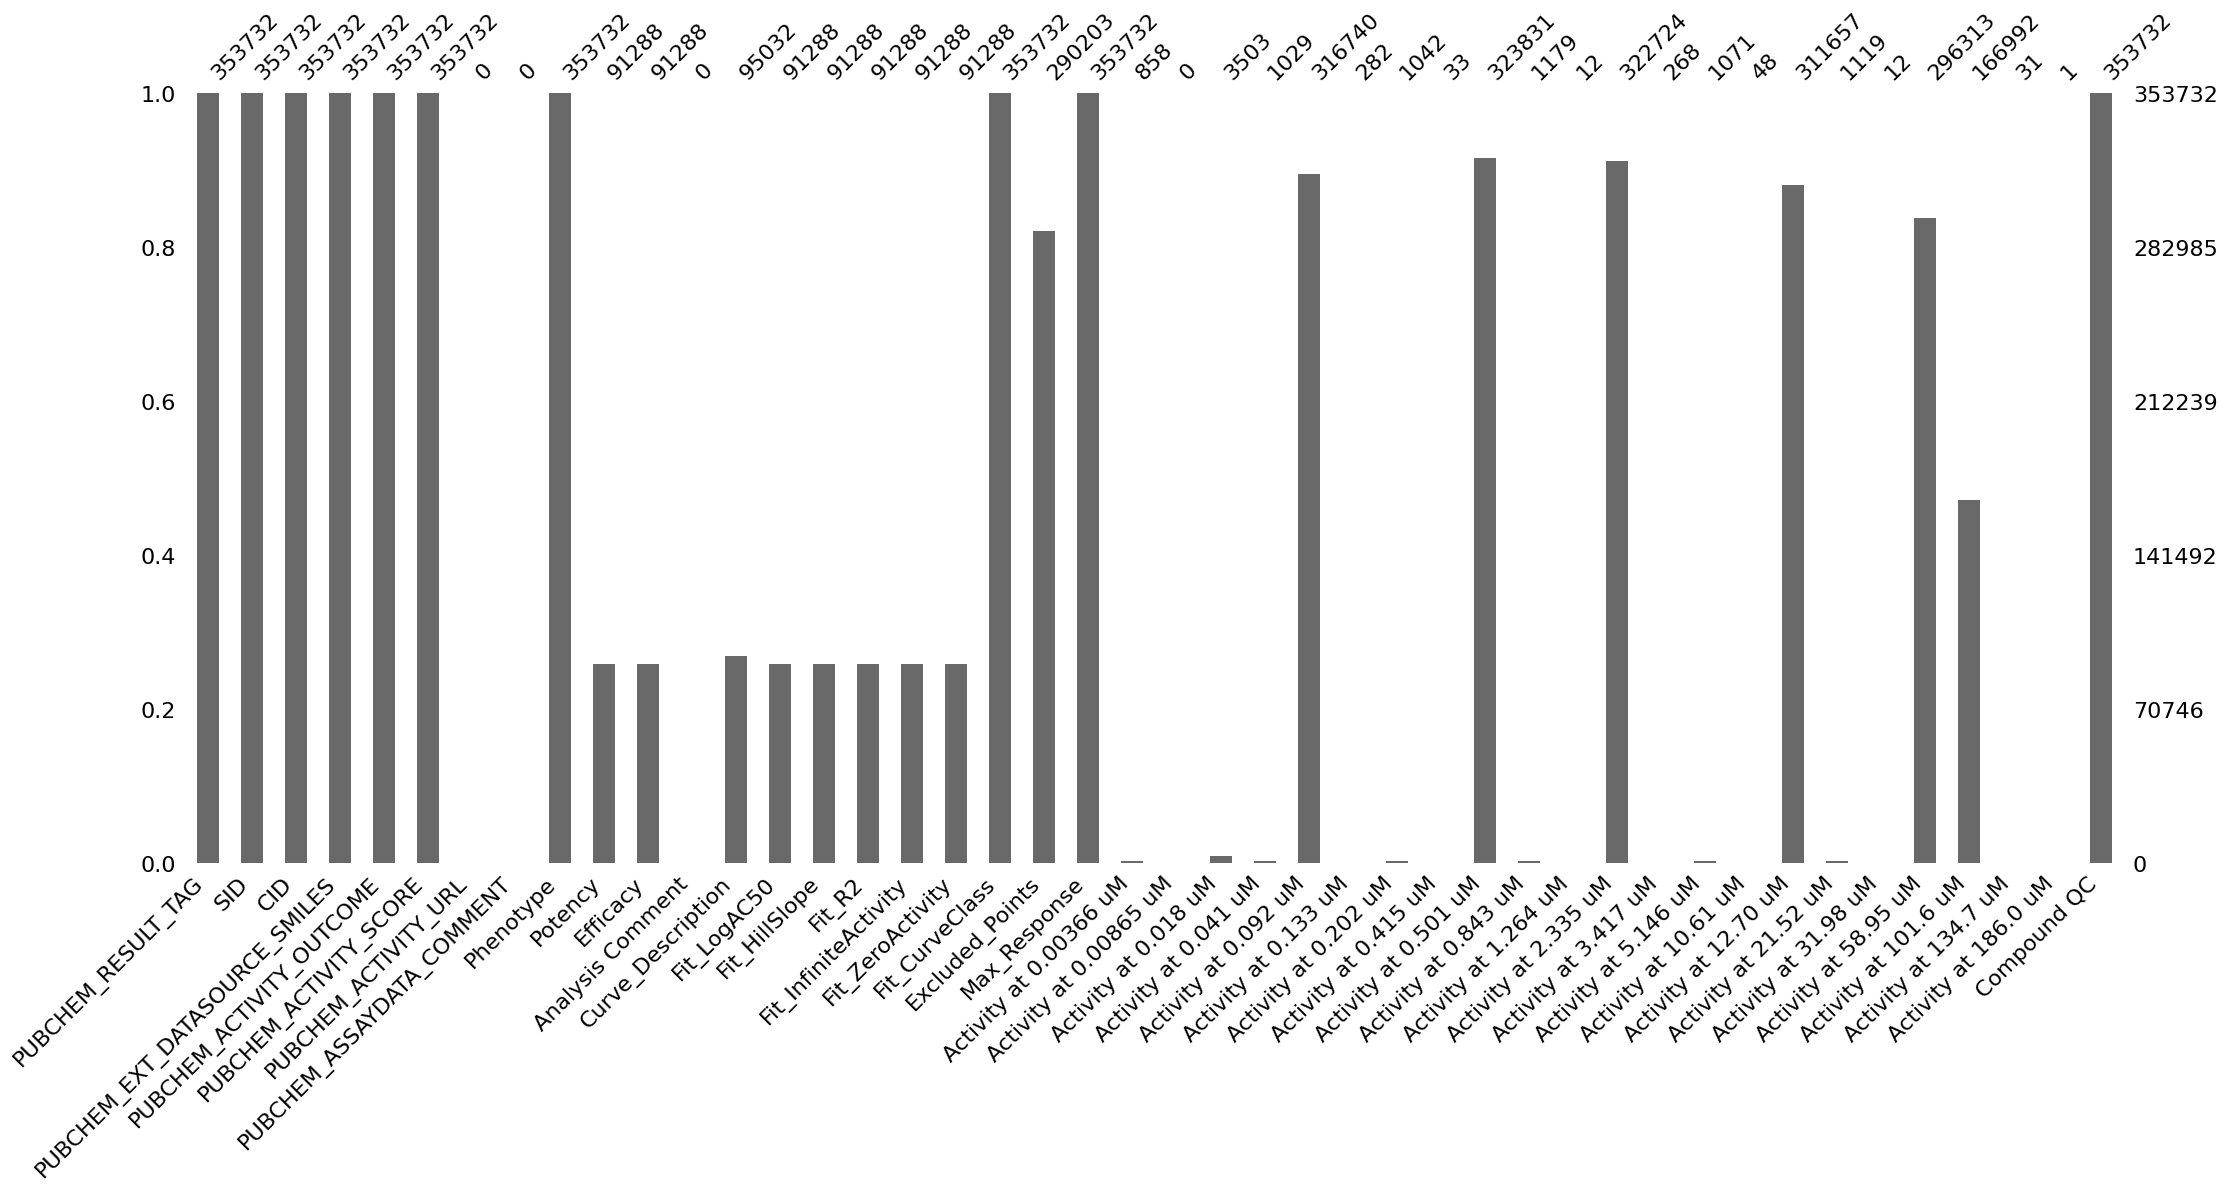

In [9]:
msno.bar(df_targets);

In [10]:
import numpy as np

# Count missing values 
def _impute_missing_data(data):
    return data.replace(-1, np.nan)

df_targets = _impute_missing_data(df_targets)
print('NaN values =', df_targets.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in df_targets.columns:
    missings = df_targets[feature].isna().sum()
    
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df_targets.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

NaN values = 9253943

Variable PUBCHEM_ACTIVITY_URL has 353732 records (100.00%) with missing values.
Variable PUBCHEM_ASSAYDATA_COMMENT has 353732 records (100.00%) with missing values.
Variable Potency has 262444 records (74.19%) with missing values.
Variable Efficacy has 262444 records (74.19%) with missing values.
Variable Analysis Comment has 353732 records (100.00%) with missing values.
Variable Curve_Description has 258700 records (73.13%) with missing values.
Variable Fit_LogAC50 has 262444 records (74.19%) with missing values.
Variable Fit_HillSlope has 262444 records (74.19%) with missing values.
Variable Fit_R2 has 262444 records (74.19%) with missing values.
Variable Fit_InfiniteActivity has 262445 records (74.19%) with missing values.
Variable Fit_ZeroActivity has 262489 records (74.21%) with missing values.
Variable Excluded_Points has 63529 records (17.96%) with missing values.
Variable Max_Response has 1 records (0.00%) with missing values.
Variable Activity at 0.00366 

[<a href="#content">Back to top</a>]

## Creating of a data frame with CID, SID and targets <a name="2"></a>

In [11]:
# Print the unique values in "PUBCHEM_ACTIVITY_OUTCOME" and "Phenotype" colums
unique_pheno = df_targets['Phenotype'].unique()
unique_outcome = df_targets['PUBCHEM_ACTIVITY_OUTCOME'].unique()
print ("Unique values in 'Phenotype' are: {}\nUnique values in 'PUBCHEM_ACTIVITY_OUTCOME' are: {}".
       format(unique_pheno, unique_outcome))

Unique values in 'Phenotype' are: ['Inactive' 'Inhibitor' 'Activator']
Unique values in 'PUBCHEM_ACTIVITY_OUTCOME' are: ['Inactive' 'Inconclusive' 'Active']


In [12]:
# Print the unique combinations between "PUBCHEM_ACTIVITY_OUTCOME" and "Phenotype" colums
df_targets['unique_combinations'] = df_targets['Phenotype'] + '-' + df_targets['PUBCHEM_ACTIVITY_OUTCOME']
print("Unique combinations between 'Phenotype' and 'PUBCHEM_ACTIVITY_OUTCOME' columns are:") 
df_targets['unique_combinations'].unique()

Unique combinations between 'Phenotype' and 'PUBCHEM_ACTIVITY_OUTCOME' columns are:


array(['Inactive-Inactive', 'Inhibitor-Inconclusive', 'Inhibitor-Active',
       'Activator-Inactive'], dtype=object)

In [13]:
# Create a data frame containing the classification targets
df_targets = df_targets [['CID', 'SID', 'unique_combinations', 'Efficacy']]

# Display the data frame
print('Shape of df_targets : ', df_targets .shape)
df_targets .head()

Shape of df_targets :  (353732, 4)


,CID,SID,unique_combinations,Efficacy
0,135953404,57257240,Inactive-Inactive,NaN
1,135953403,57257238,Inactive-Inactive,NaN
2,135953402,57255498,Inactive-Inactive,NaN
3,135953401,57255496,Inactive-Inactive,NaN
4,135953400,57255491,Inactive-Inactive,NaN


In [14]:
df_targets['unique_combinations'].value_counts()

unique_combinations
Inactive-Inactive         258158
Inhibitor-Inconclusive     52124
Inhibitor-Active           31107
Activator-Inactive         12343
Name: count, dtype: int64

In [15]:
# Set the binary targets to "1" for an active inhibitors and "0" for others 
df_targets = df_targets.copy()

# Create a dictionary
targets = {'Inhibitor-Active' : 1,
           'Inhibitor-Inconclusive' : 0,
           'Inactive-Inactive' : 0,
           'Activator-Inactive' : 0}

# Replace the names with binary values set up in the dictionary targets
df_targets.unique_combinations = [targets[item] for item in df_targets.unique_combinations]

# Rename "unique combination" into "target"
df_targets = df_targets.rename(columns={'unique_combinations': 'target'})

# Check how many unique values there are in the 'target' column
df_targets['target'].unique()

array([0, 1], dtype=int64)

In [16]:
# Count each of the binary targets
df_targets['target'].value_counts()

target
0    322625
1     31107
Name: count, dtype: int64

In [17]:
# Display the data frame
print('Shape of the df_targets: ', df_targets.shape)
df_targets.head()

Shape of the df_targets:  (353732, 4)


,CID,SID,target,Efficacy
0,135953404,57257240,0,NaN
1,135953403,57257238,0,NaN
2,135953402,57255498,0,NaN
3,135953401,57255496,0,NaN
4,135953400,57255491,0,NaN


[<a href="#content">Back to top</a>]

## Separate isomers from the basic data frame to deal with them separately <a name="3"></a>

In [18]:
# Extract duplicated CID, i.e. isomers to process then separatelly 
df_targets_isomers = df_targets[df_targets.duplicated(['CID'], keep=False)]

# Display the df_isomers
print('Shape of df_targets_isomers : ', df_targets_isomers.shape)
df_targets_isomers.head()

Shape of df_targets_isomers :  (10034, 4)


,CID,SID,target,Efficacy
519,135693590,49713836,0,135.835
520,135693590,50125956,0,NaN
521,135693589,49713835,0,117.866
522,135693589,50125989,0,NaN
525,135693585,50126029,0,NaN


In [19]:
# Remove the duplicates in column SIDin the isomers data frame
df_isomers = df_targets_isomers.drop_duplicates(subset=['SID'])

# Display the df_isomers
print('Shape of df_targets_isomers: ',df_isomers.shape)
df_isomers.head()

Shape of df_targets_isomers:  (10034, 4)


,CID,SID,target,Efficacy
519,135693590,49713836,0,135.835
520,135693590,50125956,0,NaN
521,135693589,49713835,0,117.866
522,135693589,50125989,0,NaN
525,135693585,50126029,0,NaN


In [20]:
# Remove the duplicates in the CID column
df_isomers_CID = df_targets_isomers.drop_duplicates(subset=['CID'])

# Display the df_isomers
print('Shape of df_targets_isomers: ', df_isomers_CID.shape)
df_isomers_CID.head()

Shape of df_targets_isomers:  (4637, 4)


,CID,SID,target,Efficacy
519,135693590,49713836,0,135.835
521,135693589,49713835,0,117.866
525,135693585,50126029,0,NaN
531,135693579,50126041,0,NaN
535,135693575,49713818,1,162.339


### A data frame without isomers 

In [21]:
# Remove the isomers from the current data frame
df_targets = df_targets.drop_duplicates(subset=['CID'], keep=False)
df_targets.shape

(343698, 4)

In [22]:
# Remove SID duplicates from the current data frame
df_targets = df_targets.drop_duplicates(subset=['SID'], keep=False)
df_targets.shape

(343698, 4)

In [23]:
df_targets.head()

,CID,SID,target,Efficacy
0,135953404,57257240,0,NaN
1,135953403,57257238,0,NaN
2,135953402,57255498,0,NaN
3,135953401,57255496,0,NaN
4,135953400,57255491,0,NaN


In [24]:
df_targets['target'].value_counts()

target
0    313456
1     30242
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Creating single-column lists of 1 and 0 targets for data extraction from PubChem  <a name="4"></a>

In [25]:
# Create a data set only with compounds that are active inhibitors 
df_target_1 = df_targets[df_targets['target']==1]

# Display the data set from 10 samples of active inhibitors 
print('Shape of df_traget_1: ', df_target_1.shape)
df_target_1.head()

Shape of df_traget_1:  (30242, 4)


,CID,SID,target,Efficacy
19,135915053,56319965,1,163.3340
20,135915052,56318992,1,109.5210
43,135900543,51086642,1,98.1573
46,135900540,51086515,1,146.9800
64,135897134,56318894,1,163.0410


In [26]:
# Create a csv file for downloading data from PubChem database
df_target_1.to_csv('data_for_one_column_target_1.csv') 

In [27]:
# Create a data set only with compounds that are not active inhibitors 
df_target_0 = df_targets[df_targets['target']==0]

# Display the data set from 10 samples of active inhibitors 
print('Shape of df_traget_0: ', df_target_0.shape)
df_target_0.head()

Shape of df_traget_0:  (313456, 4)


,CID,SID,target,Efficacy
0,135953404,57257240,0,NaN
1,135953403,57257238,0,NaN
2,135953402,57255498,0,NaN
3,135953401,57255496,0,NaN
4,135953400,57255491,0,NaN


In [28]:
# Create a csv file for downloading data from PubChem database
df_target_0.to_csv('data_for_one_column_target_0.csv')

[<a href="#content">Back to top</a>]

## Creating single-column lists of 1 and 0 targets for data extraction from PubChem for the isomers data sets <a name="5"></a>

In [29]:
# Create a data set only with isomers that are active inhibitors 
df_isomers_target_1 = df_isomers_CID[df_isomers_CID['target']==1]

# Display the data set with the isomers target 1
print('Shape of df_isomers_target_1: ', df_isomers_target_1.shape)
df_isomers_target_1.head()

Shape of df_isomers_target_1:  (633, 4)


,CID,SID,target,Efficacy
535,135693575,49713818,1,162.3390
538,135693572,49713814,1,120.0580
540,135693571,49713813,1,134.3990
545,135693568,49713810,1,176.1020
551,135693562,49713804,1,99.1235


In [30]:
# Create a scv file form isomers target 1
df_isomers_target_1.to_csv('data_for_one_column_isomers_target_1.csv') 

In [31]:
# Create a data set only with isomers that are inactive inhibitors 
df_isomers_target_0 = df_isomers_CID[df_isomers_CID['target']==0]

# Display the data set with the isomers target 0 
print('Shape of df_isomers_target_0: ', df_isomers_target_0.shape)
df_isomers_target_0.head()

Shape of df_isomers_target_0:  (4004, 4)


,CID,SID,target,Efficacy
519,135693590,49713836,0,135.835
521,135693589,49713835,0,117.866
525,135693585,50126029,0,NaN
531,135693579,50126041,0,NaN
542,135693570,50125963,0,NaN


In [32]:
# Create a scv file form isomers target 1
df_isomers_target_0.to_csv('data_for_one_column_isomers_target_0.csv') 

[<a href="#content">Back to top</a>]

### Adding computed properties of the compounds <a name="6"></a>

In [33]:
""" 
A single-column csv list of CIDs and SIDs was created and
compound properties calculated by PubChem were downloaded, as follows:
CID - Compound ID
MW - Molecular Weight [g/mol]
MF - Molecular Formula
TPSA - Topological Polar Surface Area [A2]
XL - XLogP3-AA
HAC - Heavy Atom Count
HBDC- Hydrogen Bond Donor Count
HBAC- Hydrogen Bond Acceptor Count
RBC - Rotatable Bond Count
SMILES - Simplified Molecular-Input Line-Entry System
Charge 
CBUC - Covalently-Bounded Unit Count
target - 1 for "Inhibitor_Active"
         0 for "Inhibitor_Inconclusive", "Inactive-Inactive" and "Activator-Inactive"

Additionally, it was downloaded 2D coordinates of substances , and 3D coordinates of the compounds. 
"""
# Load the computed by PubChem data 
df_pubChemComputed_target_1 = pd.read_csv('pubChemComputed_target_1.csv')
df_pubChemComputed_target_0 = pd.read_csv('pubChemComputed_target_0.csv')

In [34]:
# Add SID and the target column
df_pubChemComputed_target_1 = pd.merge( df_target_1, df_pubChemComputed_target_1, on="CID")

# Printout the result data frame
print("Shape of df_pubChemComputed_target_1", df_pubChemComputed_target_1.shape)
df_pubChemComputed_target_1.head()

Shape of df_pubChemComputed_target_1 (30242, 15)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,Charge,CBUC
0,135915053,56319965,1,163.3340,435.5,C23H25N5O2S,117.0,2.8,31,2,5,7,CCCN1C(=CC(=C1C)C2=CSC(=N2)NC(=O)CCC3=NC4=CC=C...,0,1
1,135915052,56318992,1,109.5210,500.6,C23H28N6O5S,172.0,0.8,35,3,8,11,CCCC1=CC(=O)NC(=N1)SCC(=O)N(CCOC)C2=C(N(C(=O)N...,0,1
2,135900543,51086642,1,98.1573,449.4,C19H14F3N5O3S,151.0,2.0,31,4,9,6,C1=CC(=CC=C1NC(=O)CSC2=NC(=C(C(=O)N2)NC(=O)C3=...,0,1
3,135900540,51086515,1,146.9800,512.5,C23H24N6O6S,199.0,0.8,36,5,9,9,CC(=O)NC1=CC=C(C=C1)NC(=O)CSC2=NC(=C(C(=O)N2)N...,0,1
4,135897134,56318894,1,163.0410,502.6,C27H30N6O4,137.0,1.8,37,3,6,9,CC(C)CN(C1=C(N(C(=O)NC1=O)CC2=CC=CC=C2)N)C(=O)...,0,1


In [35]:
# Add SID and the target column
df_pubChemComputed_target_0 = pd.merge( df_target_0, df_pubChemComputed_target_0, on="CID")

# Printout of the result data frame
print("Shape of df_pubChemComputed_target_0", df_pubChemComputed_target_0.shape)
df_pubChemComputed_target_0.head()

Shape of df_pubChemComputed_target_0 (313456, 15)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,Charge,CBUC
0,135953404,57257240,0,NaN,860.4,C36H60ClN18O5+,281.0,NaN,60,5,16,25,C#CCOCCOCCOCCNC1=NC(=NC(=N1)N2CCN(CC2)C(=O)CN3...,1,2
1,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,0,1
2,135953402,57255498,0,NaN,974.6,C43H74ClN18O6+,301.0,NaN,68,6,17,29,CCC(C)C(C(=O)N1CCN(CC1)C2=NC(=NC(=N2)N3CCN(CC3...,1,2
3,135953401,57255496,0,NaN,930.6,C41H70ClN18O5+,281.0,NaN,65,5,16,27,CCC(C)C(C(=O)N1CCN(CC1)C2=NC(=NC(=N2)N3CCN(CC3...,1,2
4,135953400,57255491,0,NaN,916.5,C40H68ClN18O5+,281.0,NaN,64,5,16,28,CCCCC1=CN(N=N1)C(CCCC[NH3+])C(=O)N2CCN(CC2)C3=...,1,2


In [36]:
# Concatenate both data sets with target 1 and target 0
df = pd.concat([df_pubChemComputed_target_0, df_pubChemComputed_target_1])

# Printout of the result data frame
print("Shape of df", df.shape)
df.head()

Shape of df (343698, 15)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,Charge,CBUC
0,135953404,57257240,0,NaN,860.4,C36H60ClN18O5+,281.0,NaN,60,5,16,25,C#CCOCCOCCOCCNC1=NC(=NC(=N1)N2CCN(CC2)C(=O)CN3...,1,2
1,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,0,1
2,135953402,57255498,0,NaN,974.6,C43H74ClN18O6+,301.0,NaN,68,6,17,29,CCC(C)C(C(=O)N1CCN(CC1)C2=NC(=NC(=N2)N3CCN(CC3...,1,2
3,135953401,57255496,0,NaN,930.6,C41H70ClN18O5+,281.0,NaN,65,5,16,27,CCC(C)C(C(=O)N1CCN(CC1)C2=NC(=NC(=N2)N3CCN(CC3...,1,2
4,135953400,57255491,0,NaN,916.5,C40H68ClN18O5+,281.0,NaN,64,5,16,28,CCCCC1=CN(N=N1)C(CCCC[NH3+])C(=O)N2CCN(CC2)C3=...,1,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343698 entries, 0 to 30241
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       343698 non-null  int32  
 1   SID       343698 non-null  int64  
 2   target    343698 non-null  int64  
 3   Efficacy  88357 non-null   float64
 4   MW        343698 non-null  float64
 5   MF        343698 non-null  object 
 6   TPSA      343698 non-null  float64
 7   XL        331778 non-null  float64
 8   HAC       343698 non-null  int64  
 9   HBDC      343698 non-null  int64  
 10  HBAC      343698 non-null  int64  
 11  RBC       343698 non-null  int64  
 12  SMILES    343698 non-null  object 
 13  Charge    343698 non-null  int64  
 14  CBUC      343698 non-null  int64  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 40.6+ MB


In [38]:
# Remove the compounds with missing XL values
df = df.dropna(subset="XL").reset_index(drop=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331778 entries, 0 to 331777
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       331778 non-null  int32  
 1   SID       331778 non-null  int64  
 2   target    331778 non-null  int64  
 3   Efficacy  82262 non-null   float64
 4   MW        331778 non-null  float64
 5   MF        331778 non-null  object 
 6   TPSA      331778 non-null  float64
 7   XL        331778 non-null  float64
 8   HAC       331778 non-null  int64  
 9   HBDC      331778 non-null  int64  
 10  HBAC      331778 non-null  int64  
 11  RBC       331778 non-null  int64  
 12  SMILES    331778 non-null  object 
 13  Charge    331778 non-null  int64  
 14  CBUC      331778 non-null  int64  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 36.7+ MB


In [40]:
# Remain only the uncharged compounds 
df = df[df.Charge ==0]

# Remove the "Charge" column
df = df.drop(columns=['Charge'], axis=1).reset_index(drop=True)

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (331462, 14)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC
0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1
1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1
2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1
3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1
4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1


In [41]:
df['target'].value_counts()

target
0    304548
1     26914
Name: count, dtype: int64

In [42]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (331462, 14)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC
0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1
1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1
2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1
3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1
4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1


[<a href="#content">Back to top</a>]

## Adding PubChem computed properties of the isomers data set <a name="7"></a>

In [43]:
# Load the computed by PubChem data 
df_pubChemComputed_isomers_target_1 = pd.read_csv('pubChemComputed_isomers_target_1.csv')
df_pubChemComputed_isomers_target_0 = pd.read_csv('pubChemComputed_isomers_target_0.csv')

In [44]:
# Add SID and the target column
df_pubChemComputed_isomers_target_1 = pd.merge(df_isomers_target_1, df_pubChemComputed_isomers_target_1, on="CID")

# Printout the result data frame
print("Shape of df_pubChemComputed_target_1", df_pubChemComputed_isomers_target_1.shape)
df_pubChemComputed_isomers_target_1.head()

Shape of df_pubChemComputed_target_1 (633, 15)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,Charge,CBUC
0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,0,1
1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,0,1
2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,0,1
3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,0,1
4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,0,1


In [45]:
# Add SID and the target column
df_pubChemComputed_isomers_target_0 = pd.merge(df_isomers_target_0, df_pubChemComputed_isomers_target_0, on="CID")

# Printout the result data frame
print("Shape of df_pubChemComputed_target_0", df_pubChemComputed_isomers_target_0.shape)
df_pubChemComputed_isomers_target_0.head()

Shape of df_pubChemComputed_target_0 (4004, 15)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,Charge,CBUC
0,135693590,49713836,0,135.835,380.5,C22H28N4O2,66.8,2.5,28,1,4,7,CCN1C(C(C(NC1=NCCC2=CN=CC=C2)C3=CC=CC=C3)C(=O)...,0,1
1,135693589,49713835,0,117.866,412.5,C23H32N4O3,66.4,1.7,30,1,5,8,CC1=C(C(NC(=NCCN2CCOCC2)N1CC3CC3)C4=CC=CC=C4)C...,0,1
2,135693585,50126029,0,NaN,533.6,C30H32FN3O5,81.6,4.5,39,1,7,10,CC1=C(C(NC(=NCC2=CC(=C(C(=C2)OC)OC)OC)N1CC3=CC...,0,1
3,135693579,50126041,0,NaN,511.5,C28H25F4N3O2,53.9,5.4,37,1,7,7,CC1=C(C(NC(=NCC2=CC(=CC=C2)C(F)(F)F)N1CC3=CC=C...,0,1
4,135693570,50125963,0,NaN,400.6,C24H40N4O,56.7,4.6,29,2,2,9,CCN1C(C(C(NC1=NCC(C)C)CCC2=CC=CC=C2)C(=O)NCC(C...,0,1


In [46]:
# Concatenate both data sets with target 1 and target 0
df_isomers = pd.concat([df_pubChemComputed_isomers_target_1, df_pubChemComputed_isomers_target_0])

In [47]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4637 entries, 0 to 4003
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4637 non-null   int32  
 1   SID       4637 non-null   int64  
 2   target    4637 non-null   int64  
 3   Efficacy  1911 non-null   float64
 4   MW        4637 non-null   float64
 5   MF        4637 non-null   object 
 6   TPSA      4637 non-null   float64
 7   XL        4236 non-null   float64
 8   HAC       4637 non-null   int64  
 9   HBDC      4637 non-null   int64  
 10  HBAC      4637 non-null   int64  
 11  RBC       4637 non-null   int64  
 12  SMILES    4637 non-null   object 
 13  Charge    4637 non-null   int64  
 14  CBUC      4637 non-null   int64  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 561.5+ KB


In [48]:
# Remove the compounds with missing XL values
df = df.dropna(subset="XL").reset_index(drop=True)

In [49]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4637 entries, 0 to 4003
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4637 non-null   int32  
 1   SID       4637 non-null   int64  
 2   target    4637 non-null   int64  
 3   Efficacy  1911 non-null   float64
 4   MW        4637 non-null   float64
 5   MF        4637 non-null   object 
 6   TPSA      4637 non-null   float64
 7   XL        4236 non-null   float64
 8   HAC       4637 non-null   int64  
 9   HBDC      4637 non-null   int64  
 10  HBAC      4637 non-null   int64  
 11  RBC       4637 non-null   int64  
 12  SMILES    4637 non-null   object 
 13  Charge    4637 non-null   int64  
 14  CBUC      4637 non-null   int64  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 561.5+ KB


In [50]:
# Remain only the uncharged compounds 
df_isomers = df_isomers[df_isomers.Charge ==0]

# Remove the "Charge" column
df_isomers = df_isomers.drop(columns=['Charge'], axis=1)

# Printout the result data frame
print("Shape of df_isomers", df_isomers.shape)
df_isomers.head()

Shape of df_isomers (4612, 14)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC
0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1
1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1
2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1
3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1
4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1


[<a href="#content">Back to top</a>]

## Adding variables based on the substance 2D coordinates <a name="8"></a>

In [51]:
# Function to process the json file with 2D coordinates to get new features
def from_json (file):
    dataset_2D = []
    substances =  file['PC_Substances']
    for substance in substances:
        
        id = substance['sid']['id']
        element = substance['compound'][0]['atoms']['element']

        if 'coords' not in substance["compound"][0]:
            print('empty coords',id)
            continue
            
        conformers_x = substance["compound"][0]['coords'][0]['conformers'][0]['x']
        conformers_y = substance["compound"][0]['coords'][0]['conformers'][0]['y']
    
        seq = False
        sixes_x = []
        sixes_y = []
        
        for i in range(len(element)):
            if element[i] == 6:
                if not seq:
                    seq = True
                sixes_x.append(conformers_x[i])
                sixes_y.append(conformers_y[i])
            elif seq:
                break
        
    
        if len(sixes_x) == 0:
            continue

        # Subtract max and min coordinates of the carbon atoms along the x-axis.
        six_maxmin_x = max(sixes_x) - min(sixes_x)
        # Subtract max and min coordinates of the all atoms along the x-axis.
        maxmin_x = max(conformers_x) - min(conformers_x)
        # Skew of the Carbon atoms data along the x-axis.
        six_skew_x = skew(sixes_x)
        # Skew of the all atoms data along the x-axis.
        all_skew_x = skew(conformers_x)

        # Subtract max and min coordinates of the carbon atoms along the y-axis.
        six_maxmin_y = max(sixes_y) - min(sixes_y)
        # Subtract max and min coordinates of the all atoms along the y-axis.
        maxmin_y = max(conformers_y) - min(conformers_y)
        # Skew of the Carbon atoms data along the y-axis.
        six_skew_y = skew(sixes_y)
        # Skew of the all atoms data along the y-axis
        all_skew_y = skew(conformers_y)

        # Combine all new features in an array
        arr = [id,six_maxmin_x,maxmin_x,six_skew_x,all_skew_x,six_maxmin_y,maxmin_y,six_skew_y,all_skew_y]
        dataset_2D.append(arr)
    # Obtain the data set as array    
    return dataset_2D 

In [52]:
import json
from scipy.stats import skew 
import numpy as np 

# Load data SID 2D coordinates
with open('SID_2D_target_0.json') as j:
    file_target_0 = json.load(j)

with open('SID_2D_target_1.json') as jj:
    file_target_1 = json.load(jj)

In [53]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_2D_json_target_0 = pd.DataFrame(from_json(file_target_0)) 
df_2D_json_target_1 = pd.DataFrame(from_json(file_target_1)) 

# Concatenate both data sets with target 1 and target 0
df_2D_json = pd.concat([df_2D_json_target_0, df_2D_json_target_1])

empty coords 11112834
empty coords 11112607
empty coords 29215274
empty coords 50111673
empty coords 29214997
empty coords 29215012
empty coords 50111727
empty coords 11112548
empty coords 26755777
empty coords 29215536
empty coords 26748940
empty coords 50113279
empty coords 50125753
empty coords 26750026
empty coords 26748966
empty coords 50125778
empty coords 26755728
empty coords 29215490
empty coords 29215411
empty coords 90341222
empty coords 90341813
empty coords 29215484
empty coords 50113286
empty coords 50125750
empty coords 90340689
empty coords 29215279
empty coords 26758016
empty coords 29215025
empty coords 50125942
empty coords 11112129
empty coords 11112307
empty coords 26749194
empty coords 26748547
empty coords 26755022
empty coords 90341388
empty coords 50113283
empty coords 29215010
empty coords 29214995
empty coords 11112219
empty coords 90341433
empty coords 11113072
empty coords 29217883
empty coords 50113276
empty coords 50125937
empty coords 50125808
empty coor

C:\Users\ivano\AppData\Local\Temp\ipykernel_24624\327130293.py:39: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_x = skew(sixes_x)
C:\Users\ivano\AppData\Local\Temp\ipykernel_24624\327130293.py:48: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_y = skew(sixes_y)


empty coords 90341778
empty coords 26752069
empty coords 50112788
empty coords 11112564
empty coords 50125938
empty coords 29215253
empty coords 11112878
empty coords 11114076
empty coords 50113275
empty coords 26749175
empty coords 29216078
empty coords 50125822
empty coords 26757994
empty coords 11112956
empty coords 50125866
empty coords 50125901
empty coords 26757964
empty coords 50112785
empty coords 50125752
empty coords 29215234
empty coords 50112740
empty coords 26758056
empty coords 29215380
empty coords 90340807
empty coords 29215361
empty coords 29215409
empty coords 11112680
empty coords 26757962
empty coords 26757969
empty coords 26755742
empty coords 26755801
empty coords 90341643
empty coords 50125893
empty coords 26751695
empty coords 26756603
empty coords 90341269
empty coords 90340719
empty coords 90340604
empty coords 29215547
empty coords 26756741


In [54]:
# Rename columns in the new data frame
df_2D_json = df_2D_json.rename(index=str, columns={0:'SID', 1:'MMX6', 2:'MMX', 3:'SX6', 4:'SX', 5:'MMY6', 6:'MMY', 7:'SY6', 8:'SY'})

# Display the data frame
print('Shape of df_2D_json: ', df_2D_json.shape)
df_2D_json.head()

Shape of df_2D_json:  (343589, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,57257240,27.7972,32.2769,0.381744,0.377282,27.7952,28.7673,0.777109,0.763477
1,57257238,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707
2,57255498,26.4029,30.3957,0.345439,0.425754,27.7952,28.7673,1.098056,1.000374
3,57255496,27.7929,32.0994,0.196753,0.225045,27.8383,28.8082,0.972023,0.880945
4,57255491,28.8952,32.7644,0.257785,0.240758,27.8383,28.8082,0.992659,0.912162


In [55]:
# Remove all zeroes
df_2D_json.loc[~(df_2D_json==0).all(axis=1)]

# Display the data frame
print('Shape of df_2D_json: ', df_2D_json.shape)
df_2D_json.head()

Shape of df_2D_json:  (343589, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,57257240,27.7972,32.2769,0.381744,0.377282,27.7952,28.7673,0.777109,0.763477
1,57257238,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707
2,57255498,26.4029,30.3957,0.345439,0.425754,27.7952,28.7673,1.098056,1.000374
3,57255496,27.7929,32.0994,0.196753,0.225045,27.8383,28.8082,0.972023,0.880945
4,57255491,28.8952,32.7644,0.257785,0.240758,27.8383,28.8082,0.992659,0.912162


In [56]:
# Add the new data frame df_2D to the already existing df based on SID
df = pd.merge(df, df_2D_json, on="SID")

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (331393, 22)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707
1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359
2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437
3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253
4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331393 entries, 0 to 331392
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       331393 non-null  int32  
 1   SID       331393 non-null  int64  
 2   target    331393 non-null  int64  
 3   Efficacy  82109 non-null   float64
 4   MW        331393 non-null  float64
 5   MF        331393 non-null  object 
 6   TPSA      331393 non-null  float64
 7   XL        331393 non-null  float64
 8   HAC       331393 non-null  int64  
 9   HBDC      331393 non-null  int64  
 10  HBAC      331393 non-null  int64  
 11  RBC       331393 non-null  int64  
 12  SMILES    331393 non-null  object 
 13  CBUC      331393 non-null  int64  
 14  MMX6      331393 non-null  float64
 15  MMX       331393 non-null  float64
 16  SX6       331377 non-null  float64
 17  SX        331393 non-null  float64
 18  MMY6      331393 non-null  float64
 19  MMY       331393 non-null  float64
 20  SY6 

In [58]:
# Remove the compounds with missing values in SX6 and SY6
df = df.dropna(subset=["SX6","SY6"]).reset_index(drop=True)

[<a href="#content">Back to top</a>]

## Adding variables based on the substance 2D coordinates for the isomers data set <a name="9"></a>

In [59]:
# Load data SID 2D coordinates
with open('SID_2D_isomers_target_0.json') as j:
    file_target_0 = json.load(j)

with open('SID_2D_isomers_target_1.json') as jj:
    file_target_1 = json.load(jj)

In [60]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_2D_json_isomers_target_0 = pd.DataFrame(from_json(file_target_0)) 
df_2D_json_isomers_target_1 = pd.DataFrame(from_json(file_target_1)) 

# Concatenate both data sets with target 1 and target 0
df_2D_json_isomers = pd.concat([df_2D_json_isomers_target_0, df_2D_json_isomers_target_1])

C:\Users\ivano\AppData\Local\Temp\ipykernel_24624\327130293.py:39: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_x = skew(sixes_x)


empty coords 26747886
empty coords 90340579
empty coords 11112745
empty coords 90340638
empty coords 90341434
empty coords 90341638
empty coords 29215388
empty coords 11112211
empty coords 90341535


C:\Users\ivano\AppData\Local\Temp\ipykernel_24624\327130293.py:48: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_y = skew(sixes_y)


empty coords 90340876


In [61]:
# Rename columns in the new data frame
df_2D_json_isomers = df_2D_json_isomers.rename(index=str, columns={0:'SID', 1:'MMX6', 2:'MMX', 3:'SX6', 4:'SX', 5:'MMY6', 6:'MMY', 7:'SY6', 8:'SY'})

# Display the data frame
print('Shape of df_2D_json_isomers: ', df_2D_json_isomers.shape)
df_2D_json_isomers.head()

Shape of df_2D_json_isomers:  (4625, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,49713836,7.8084,7.8084,0.230247,0.003006,13.1937,13.1937,-0.419200,-0.392487
1,49713835,12.7302,12.7346,-0.707333,-0.613856,11.0012,11.0012,-0.067069,-0.149226
2,50126029,6.4302,7.1447,-0.231877,-0.205757,7.8375,7.8375,0.596712,0.510156
3,50126041,6.4302,7.1447,-0.340269,-0.350524,6.6000,7.3144,0.692039,0.599837
4,50125963,6.4303,6.4303,-0.102698,0.171216,6.1876,6.1876,-0.125086,-0.135980


In [62]:
# Remove all zeroes
df_2D_json_isomers.loc[~(df_2D_json_isomers==0).all(axis=1)]

# Display the data frame
print('Shape of df_2D_json_isomers: ', df_2D_json_isomers.shape)
df_2D_json_isomers.head()

Shape of df_2D_json_isomers:  (4625, 9)


,SID,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,49713836,7.8084,7.8084,0.230247,0.003006,13.1937,13.1937,-0.419200,-0.392487
1,49713835,12.7302,12.7346,-0.707333,-0.613856,11.0012,11.0012,-0.067069,-0.149226
2,50126029,6.4302,7.1447,-0.231877,-0.205757,7.8375,7.8375,0.596712,0.510156
3,50126041,6.4302,7.1447,-0.340269,-0.350524,6.6000,7.3144,0.692039,0.599837
4,50125963,6.4303,6.4303,-0.102698,0.171216,6.1876,6.1876,-0.125086,-0.135980


In [63]:
# Add the new data frame df_2D to the already existing df based on SID
df_isomers = pd.merge(df_isomers, df_2D_json_isomers, on="SID")

# Display the data frame
print('Shape of df_isomers: ', df_isomers.shape)
df_isomers.head()

Shape of df_isomers:  (4601, 22)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY
0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874
1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220
2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037
3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878
4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487


In [64]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4601 non-null   int32  
 1   SID       4601 non-null   int64  
 2   target    4601 non-null   int64  
 3   Efficacy  1885 non-null   float64
 4   MW        4601 non-null   float64
 5   MF        4601 non-null   object 
 6   TPSA      4601 non-null   float64
 7   XL        4207 non-null   float64
 8   HAC       4601 non-null   int64  
 9   HBDC      4601 non-null   int64  
 10  HBAC      4601 non-null   int64  
 11  RBC       4601 non-null   int64  
 12  SMILES    4601 non-null   object 
 13  CBUC      4601 non-null   int64  
 14  MMX6      4601 non-null   float64
 15  MMX       4601 non-null   float64
 16  SX6       4591 non-null   float64
 17  SX        4601 non-null   float64
 18  MMY6      4601 non-null   float64
 19  MMY       4601 non-null   float64
 20  SY6       4592 non-null   floa

In [65]:
# Remove the compounds with missing values in SX6 and SY6
df_isomers = df_isomers.dropna(subset=['SX6', 'SY6']).reset_index(drop=True)
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4589 non-null   int32  
 1   SID       4589 non-null   int64  
 2   target    4589 non-null   int64  
 3   Efficacy  1876 non-null   float64
 4   MW        4589 non-null   float64
 5   MF        4589 non-null   object 
 6   TPSA      4589 non-null   float64
 7   XL        4200 non-null   float64
 8   HAC       4589 non-null   int64  
 9   HBDC      4589 non-null   int64  
 10  HBAC      4589 non-null   int64  
 11  RBC       4589 non-null   int64  
 12  SMILES    4589 non-null   object 
 13  CBUC      4589 non-null   int64  
 14  MMX6      4589 non-null   float64
 15  MMX       4589 non-null   float64
 16  SX6       4589 non-null   float64
 17  SX        4589 non-null   float64
 18  MMY6      4589 non-null   float64
 19  MMY       4589 non-null   float64
 20  SY6       4589 non-null   floa

[<a href="#content">Back to top</a>]

### Adding hypothetical volumes of the compounds based on their substances 2D coordinates <a name="10"></a>

In [66]:
import math

# Volume 1 
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df ['MMX'] - df ['MMX6']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df ['MMY'] - df ['MMY6']

# Square the result
along_Y = along_Y **2 

# Use the Pythagorean theorem to find the radius of a sphere
XY = along_X + along_Y
diagonal = XY**1/2

# Radius of a sphere
radius = diagonal/2
pi = math.pi

# Calculate the volume of a sphere and make the volume colum a column of df 
df ['Volume_1'] = 4*pi*radius**3
df ['Volume_1'] = df ['Volume_1']/3

In [67]:
# Volume 2
# Find the median along x-axis
along_CarbonAtoms_X_axis = df['MMX6']/2
along_allAtoms_X_axis = df['MMX']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along x-axis 
distance_X = distance_between_medians_all_C_along_X - df['SX6'] +  df['SX'] 

# Find the median along y-axis
along_CarbonAtoms_Y_axis = df['MMY6']/2
along_allAtoms_Y_axis = df['MMY']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df['SY6'] +  df['SY'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_2D = ((distance_X**2 + distance_Y**2)**1/2)*1/2

# Hypotetical volumes:
df['Volume_2'] = (pi*(xy_2D)**3)*1/3

In [68]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (331374, 24)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2
0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205
1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066
2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185
3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032
4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331374 entries, 0 to 331373
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       331374 non-null  int32  
 1   SID       331374 non-null  int64  
 2   target    331374 non-null  int64  
 3   Efficacy  82104 non-null   float64
 4   MW        331374 non-null  float64
 5   MF        331374 non-null  object 
 6   TPSA      331374 non-null  float64
 7   XL        331374 non-null  float64
 8   HAC       331374 non-null  int64  
 9   HBDC      331374 non-null  int64  
 10  HBAC      331374 non-null  int64  
 11  RBC       331374 non-null  int64  
 12  SMILES    331374 non-null  object 
 13  CBUC      331374 non-null  int64  
 14  MMX6      331374 non-null  float64
 15  MMX       331374 non-null  float64
 16  SX6       331374 non-null  float64
 17  SX        331374 non-null  float64
 18  MMY6      331374 non-null  float64
 19  MMY       331374 non-null  float64
 20  SY6 

[<a href="#content">Back to top</a>]

## Adding hypothetical volumes of the compounds based on their substances 2D coordinates for the isomers data set <a name="11"></a>

In [70]:
# Volume 1 
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df_isomers ['MMX'] - df_isomers ['MMX6']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df_isomers ['MMY'] - df_isomers ['MMY6']

# Square the result
along_Y = along_Y **2 

# Use the Pythagorean theorem to find the radius of a sphere
XY = along_X + along_Y
diagonal = XY**1/2

# Radius of a sphere
radius = diagonal/2
pi = math.pi

# Calculate the volume of a sphere and make the volume colum a column of df 
df_isomers ['Volume_1'] = 4*pi*radius**3
df_isomers ['Volume_1'] = df_isomers ['Volume_1']/3

In [71]:
# Volume 2
# Find the median along x-axis
along_CarbonAtoms_X_axis = df_isomers['MMX6']/2
along_allAtoms_X_axis = df_isomers['MMX']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along x-axis 
distance_X = distance_between_medians_all_C_along_X - df_isomers['SX6'] +  df_isomers['SX'] 

# Find the median along y-axis
along_CarbonAtoms_Y_axis = df_isomers['MMY6']/2
along_allAtoms_Y_axis = df_isomers['MMY']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df_isomers['SY6'] +  df_isomers['SY'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_2D = ((distance_X**2 + distance_Y**2)**1/2)*1/2

# Hypotetical volumes:
df_isomers['Volume_2'] = (pi*(xy_2D)**3)*1/3

In [72]:
# Display the data frame
print('Shape of df_isomers: ', df_isomers.shape)
df_isomers.head()

Shape of df_isomers:  (4589, 24)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2
0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874,5.808698e-17,1.219525e-07
1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220,4.749246e-16,3.518769e-09
2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037,0.000000e+00,4.335385e-06
3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878,0.000000e+00,2.051535e-08
4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487,1.151674e-15,2.427595e-06


In [73]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4589 non-null   int32  
 1   SID       4589 non-null   int64  
 2   target    4589 non-null   int64  
 3   Efficacy  1876 non-null   float64
 4   MW        4589 non-null   float64
 5   MF        4589 non-null   object 
 6   TPSA      4589 non-null   float64
 7   XL        4200 non-null   float64
 8   HAC       4589 non-null   int64  
 9   HBDC      4589 non-null   int64  
 10  HBAC      4589 non-null   int64  
 11  RBC       4589 non-null   int64  
 12  SMILES    4589 non-null   object 
 13  CBUC      4589 non-null   int64  
 14  MMX6      4589 non-null   float64
 15  MMX       4589 non-null   float64
 16  SX6       4589 non-null   float64
 17  SX        4589 non-null   float64
 18  MMY6      4589 non-null   float64
 19  MMY       4589 non-null   float64
 20  SY6       4589 non-null   floa

[<a href="#content">Back to top</a>]

## Adding variables of the compounds based on their 3D coordinates <a name="12"></a>

In [74]:
# Create new features out of the 3D coordinates
def from_json_3D (file):
    dataset_3D = []
    compounds = file['PC_Compounds']
    for compound in compounds:
        
        id = compound['id']['id']['cid']
        element = compound['atoms']['element']
        
        conformers_x = compound['coords'][0]['conformers'][0]['x']
        conformers_y = compound['coords'][0]['conformers'][0]['y']
        conformers_z = compound['coords'][0]['conformers'][0]['z']
    
        seq = False
        sixes_x = []
        sixes_y = []
        sixes_z = []
        
        for i in range(len(element)):
            if element[i] == 6:
                if not seq:
                    seq = True
                sixes_x.append(conformers_x[i])
                sixes_y.append(conformers_y[i])
                sixes_z.append(conformers_z[i])
            elif seq:
                break
        
    
        if len(sixes_x) == 0:
            continue
    
        # Subtract max and min coordinates of the carbon atoms along the x-axis
        six_maxmin_x = max(sixes_x) - min(sixes_x)
        # Subtract max and min coordinates of the all atoms along the x-axis
        maxmin_x = max(conformers_x) - min(conformers_x)
        # Skew of the Carbon atoms data along the x-axis
        six_skew_x = skew(sixes_x)
        # Skew of the all atoms data along the x-axis
        all_skew_x = skew(conformers_x)
    
        # Subtract max and min coordinates of the carbon atoms along the y-axis
        six_maxmin_y = max(sixes_y) - min(sixes_y)
        # Subtract max and min coordinates of the all atoms along the y-axis
        maxmin_y = max(conformers_y) - min(conformers_y)
        # Skew of the Carbon atoms data along the y-axis
        six_skew_y = skew(sixes_y)
        # Skew of the all atoms data along the y-axis
        all_skew_y = skew(conformers_y)
    
        # Subtract max and min coordinates of the carbon atoms along the z-axis
        six_maxmin_z = max(sixes_z) - min(sixes_z)
        # Subtract max and min coordinates of the all atoms along the z-axis
        maxmin_z = max(conformers_z) - min(conformers_z)
        # Skew of the Carbon atoms data along the z-axis
        six_skew_z = skew(sixes_z)
        # Skew of the all atoms data along the z-axis
        all_skew_z = skew(conformers_z)
        
        # Combine all new features in an array
        arr = [id,six_maxmin_x,maxmin_x,six_skew_x,all_skew_x,
               six_maxmin_y,maxmin_y,six_skew_y,all_skew_y,
               six_maxmin_z,maxmin_z,six_skew_z,all_skew_z,]
        # Obtain a dataset as an array
        dataset_3D.append(arr)        
    # Obtain the data set as array    
    return dataset_3D 

In [75]:
# Load data CID 3D coordinates
with open('CID_3D_target_0.json') as j:
    file_target_0 = json.load(j)

with open('CID_3D_target_1.json') as jj:
    file_target_1 = json.load(jj)

In [76]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_3D_json_target_0 = pd.DataFrame(from_json_3D(file_target_0)) 
df_3D_json_target_1 = pd.DataFrame(from_json_3D(file_target_1)) 

# Concatenate both data sets with target 1 and target 0
df_3D = pd.concat([df_3D_json_target_0, df_3D_json_target_1])

C:\Users\ivano\AppData\Local\Temp\ipykernel_24624\3513261689.py:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  six_skew_z = skew(sixes_z)


In [77]:
# Rename columns in the new data frame
df_3D = df_3D.rename(index=str, columns={0:'CID', 
                                         1:'MMX6_3D', 2:'MMX_3D', 3:'SX6_3D', 4:'SX_3D',
                                         5:'MMY6_3D', 6:'MMY_3D', 7:'SY6_3D', 8:'SY_3D',
                                         9:'MMZ6_3D', 10:'MMZ_3D', 11:'SZ6_3D', 12:'SZ_3D'})
# Display the data frame
print('Shape of df_3D: ', df_3D.shape)
df_3D.head()

Shape of df_3D:  (330132, 13)


,CID,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135953403,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230
1,135932426,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040
2,135932425,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643
3,135925273,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760
4,135925269,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087


In [78]:
# Add the new data frame df_3D to the existing one df based on CID
df = pd.merge(df, df_3D, on="CID")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329765 entries, 0 to 329764
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       329765 non-null  int32  
 1   SID       329765 non-null  int64  
 2   target    329765 non-null  int64  
 3   Efficacy  81796 non-null   float64
 4   MW        329765 non-null  float64
 5   MF        329765 non-null  object 
 6   TPSA      329765 non-null  float64
 7   XL        329765 non-null  float64
 8   HAC       329765 non-null  int64  
 9   HBDC      329765 non-null  int64  
 10  HBAC      329765 non-null  int64  
 11  RBC       329765 non-null  int64  
 12  SMILES    329765 non-null  object 
 13  CBUC      329765 non-null  int64  
 14  MMX6      329765 non-null  float64
 15  MMX       329765 non-null  float64
 16  SX6       329765 non-null  float64
 17  SX        329765 non-null  float64
 18  MMY6      329765 non-null  float64
 19  MMY       329765 non-null  float64
 20  SY6 

In [79]:
# Drop the missing values in the SZ6_3D column
df = df.dropna(subset='SZ6_3D').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CID       329756 non-null  int32  
 1   SID       329756 non-null  int64  
 2   target    329756 non-null  int64  
 3   Efficacy  81794 non-null   float64
 4   MW        329756 non-null  float64
 5   MF        329756 non-null  object 
 6   TPSA      329756 non-null  float64
 7   XL        329756 non-null  float64
 8   HAC       329756 non-null  int64  
 9   HBDC      329756 non-null  int64  
 10  HBAC      329756 non-null  int64  
 11  RBC       329756 non-null  int64  
 12  SMILES    329756 non-null  object 
 13  CBUC      329756 non-null  int64  
 14  MMX6      329756 non-null  float64
 15  MMX       329756 non-null  float64
 16  SX6       329756 non-null  float64
 17  SX        329756 non-null  float64
 18  MMY6      329756 non-null  float64
 19  MMY       329756 non-null  float64
 20  SY6 

In [80]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (329756, 36)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230
1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040
2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643
3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760
4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087


[<a href="#content">Back to top</a>]

## Adding variables based on the compounds 3D coordinates for the isomers data set <a name="13"></a>

In [81]:
# Load data SID 3D coordinates
with open('CID_3D_isomers_target_0.json') as j:
    file_target_0 = json.load(j)

with open('CID_3D_isomers_target_1.json') as jj:
    file_target_1 = json.load(jj)

In [82]:
# Create a data frame with new features using data in the json file and the "from_json (file)" function
df_3D_json_isomers_target_0 = pd.DataFrame(from_json_3D(file_target_0)) 
df_3D_json_isomers_target_1 = pd.DataFrame(from_json_3D(file_target_1)) 

# Concatenate both data sets with target 1 and target 0
df_3D_isomers = pd.concat([df_3D_json_isomers_target_0, df_3D_json_isomers_target_1])

In [83]:
# Rename columns in the new data frame
df_3D_isomers = df_3D_isomers.rename(index=str, columns={0:'CID', 
                                         1:'MMX6_3D', 2:'MMX_3D', 3:'SX6_3D', 4:'SX_3D',
                                         5:'MMY6_3D', 6:'MMY_3D', 7:'SY6_3D', 8:'SY_3D',
                                         9:'MMZ6_3D', 10:'MMZ_3D', 11:'SZ6_3D', 12:'SZ_3D'})
# Display the data frame
print('Shape of df_3D_isomers: ', df_3D_isomers.shape)
df_3D_isomers.head()

Shape of df_3D_isomers:  (4185, 13)


,CID,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135693590,11.4861,12.7894,-0.450009,-0.390443,8.0589,9.7745,0.025895,-0.257742,2.9313,4.9446,0.130762,-0.047857
1,135693589,12.0193,13.6720,0.803393,0.403850,8.5311,10.0432,0.457529,0.373028,5.6900,7.5534,0.189516,0.293081
2,135693585,14.5031,16.0807,-0.506120,-0.328752,8.1321,9.6434,0.494460,0.246975,6.1582,8.0333,-0.468071,-0.481813
3,135693579,12.7373,14.5264,-0.483250,-0.401993,8.1916,9.7464,0.196332,0.082546,5.4442,7.3945,-0.319087,-0.409856
4,135693570,11.2422,13.0857,-0.219498,-0.024345,10.2967,12.1463,0.534381,0.319296,4.2410,5.7305,-0.344461,-0.073371


In [84]:
# Add the new data frame df_3D to the existing one df based on CID
df_isomers = pd.merge(df_isomers, df_3D_isomers, on="CID")
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CID       4150 non-null   int32  
 1   SID       4150 non-null   int64  
 2   target    4150 non-null   int64  
 3   Efficacy  1598 non-null   float64
 4   MW        4150 non-null   float64
 5   MF        4150 non-null   object 
 6   TPSA      4150 non-null   float64
 7   XL        4150 non-null   float64
 8   HAC       4150 non-null   int64  
 9   HBDC      4150 non-null   int64  
 10  HBAC      4150 non-null   int64  
 11  RBC       4150 non-null   int64  
 12  SMILES    4150 non-null   object 
 13  CBUC      4150 non-null   int64  
 14  MMX6      4150 non-null   float64
 15  MMX       4150 non-null   float64
 16  SX6       4150 non-null   float64
 17  SX        4150 non-null   float64
 18  MMY6      4150 non-null   float64
 19  MMY       4150 non-null   float64
 20  SY6       4150 non-null   floa

In [85]:
# Display the data frame
print('Shape of df_isomers: ', df_isomers.shape)
df_isomers.head()

Shape of df_isomers:  (4150, 36)


,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D
0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874,5.808698e-17,1.219525e-07,9.2775,11.0222,-0.383622,-0.028110,6.2096,7.9083,0.168685,0.018748,3.2264,5.1040,-0.017000,-0.052789
1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220,4.749246e-16,3.518769e-09,11.4854,13.3302,0.113155,0.078322,7.0444,8.9195,-0.199386,-0.142788,2.8548,4.8745,0.209448,0.133564
2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037,0.000000e+00,4.335385e-06,9.7653,11.6519,-0.466850,-0.141354,6.1142,7.8315,0.090885,-0.112701,2.5517,4.5634,-0.340169,-0.107432
3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878,0.000000e+00,2.051535e-08,12.9713,14.6739,-0.361882,-0.010766,6.2429,7.9628,0.096307,-0.003862,3.4013,5.4415,0.195125,0.072782
4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487,1.151674e-15,2.427595e-06,12.8671,14.4616,-0.508599,-0.140888,6.2445,7.9651,-0.060660,-0.128613,2.7364,4.8020,-0.399977,-0.196834


[<a href="#content">Back to top</a>]

## Adding hypothetical volumes of the compounds based on their 3D coordinates <a name="14"></a>

In [86]:
import math

# Volume 1
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df ['MMX_3D'] - df ['MMX6_3D']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df ['MMY_3D'] - df ['MMY6_3D']

# Square the result
along_Y = along_Y **2 

# Difference between max-min of all atoms and max-min of the C atoms along z-axis
along_Z = df ['MMZ_3D'] - df ['MMZ6_3D']

# Square the result
along_Z = along_Z **2 

# Use the Pythagorean theorem to find the radius of a cuboid
volume_1_3D = along_X*along_Y*along_Z

# Make the volume colum a column of df  
df ['Volume_1_3D'] = volume_1_3D

In [87]:
# Volume 2
# Find the median 
along_CarbonAtoms_X_axis = df['MMX6_3D']/2
along_allAtoms_X_axis = df['MMX_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along X axis 
distance_X = distance_between_medians_all_C_along_X - df['SX6_3D'] +  df['SX_3D'] 

# Find the median 
along_CarbonAtoms_Y_axis = df['MMY6_3D']/2
along_allAtoms_Y_axis = df['MMY_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df['SY6_3D'] +  df['SY_3D'] 

# Find the median 
along_CarbonAtoms_Z_axis = df['MMZ6_3D']/2
along_allAtoms_Z_axis = df['MMZ_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Z = along_CarbonAtoms_Z_axis - along_allAtoms_Z_axis

# Find the distance betweeen skew along X axis 
distance_Z = distance_between_medians_all_C_along_Z - df['SZ6_3D'] +  df['SZ_3D'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_3D = ((distance_X**2 + distance_Y**2)**1/2)*1/2
xz_3D = ((distance_X**2 + distance_Z**2)**1/2)*1/2
yz_3D = ((distance_Z**2 + distance_Y**2)**1/2)*1/2

pi = math.pi

# Hypotetical volumes:
df['XY_3D_volume'] = (pi*(xy_3D)**3)*1/3
df['XZ_3D_volume'] = (pi*(xz_3D)**3)*1/3
df['YZ_3D_volume']= (pi*(yz_3D)**3)*1/3

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CID           329756 non-null  int32  
 1   SID           329756 non-null  int64  
 2   target        329756 non-null  int64  
 3   Efficacy      81794 non-null   float64
 4   MW            329756 non-null  float64
 5   MF            329756 non-null  object 
 6   TPSA          329756 non-null  float64
 7   XL            329756 non-null  float64
 8   HAC           329756 non-null  int64  
 9   HBDC          329756 non-null  int64  
 10  HBAC          329756 non-null  int64  
 11  RBC           329756 non-null  int64  
 12  SMILES        329756 non-null  object 
 13  CBUC          329756 non-null  int64  
 14  MMX6          329756 non-null  float64
 15  MMX           329756 non-null  float64
 16  SX6           329756 non-null  float64
 17  SX            329756 non-null  float64
 18  MMY6

## Adding hypothetical volumes based on the compounds 3D coordinates for the isomers data set <a name="14"></a>

In [89]:
# Volume 1
# Difference between max-min of all atoms and max-min of the C atoms along x-axis
along_X = df_isomers ['MMX_3D'] - df_isomers ['MMX6_3D']

# Square the result
along_X = along_X **2 

# Difference between max-min of all atoms and max-min of the C atoms along y-axis
along_Y = df_isomers ['MMY_3D'] - df_isomers ['MMY6_3D']

# Square the result
along_Y = along_Y **2 

# Difference between max-min of all atoms and max-min of the C atoms along z-axis
along_Z = df_isomers ['MMZ_3D'] - df_isomers ['MMZ6_3D']

# Square the result
along_Z = along_Z **2 

# Use the Pythagorean theorem to find the radius of a cuboid
volume_1_3D = along_X*along_Y*along_Z

# Make the volume colum a column of df  
df_isomers ['Volume_1_3D'] = volume_1_3D

In [90]:
# Volume 2
# Find the median 
along_CarbonAtoms_X_axis = df_isomers['MMX6_3D']/2
along_allAtoms_X_axis = df_isomers['MMX_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_X = along_CarbonAtoms_X_axis - along_allAtoms_X_axis

# Find the distance betweeen skew along X axis 
distance_X = distance_between_medians_all_C_along_X - df_isomers['SX6_3D'] +  df_isomers['SX_3D'] 

# Find the median 
along_CarbonAtoms_Y_axis = df_isomers['MMY6_3D']/2
along_allAtoms_Y_axis = df_isomers['MMY_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Y = along_CarbonAtoms_Y_axis - along_allAtoms_Y_axis

# Find the distance betweeen skew along X axis 
distance_Y = distance_between_medians_all_C_along_Y - df_isomers['SY6_3D'] +  df_isomers['SY_3D'] 

# Find the median 
along_CarbonAtoms_Z_axis = df_isomers['MMZ6_3D']/2
along_allAtoms_Z_axis = df_isomers['MMZ_3D']/2

# Find the distance between them
distance_between_medians_all_C_along_Z = along_CarbonAtoms_Z_axis - along_allAtoms_Z_axis

# Find the distance betweeen skew along X axis 
distance_Z = distance_between_medians_all_C_along_Z - df_isomers['SZ6_3D'] +  df_isomers['SZ_3D'] 

# Find the middle of the hypotenuse in the planes xy/xz/yz
xy_3D = ((distance_X**2 + distance_Y**2)**1/2)*1/2
xz_3D = ((distance_X**2 + distance_Z**2)**1/2)*1/2
yz_3D = ((distance_Z**2 + distance_Y**2)**1/2)*1/2

pi = math.pi

# Hypotetical volumes:
df_isomers['XY_3D_volume'] = (pi*(xy_3D)**3)*1/3
df_isomers['XZ_3D_volume'] = (pi*(xz_3D)**3)*1/3
df_isomers['YZ_3D_volume']= (pi*(yz_3D)**3)*1/3

In [91]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CID           4150 non-null   int32  
 1   SID           4150 non-null   int64  
 2   target        4150 non-null   int64  
 3   Efficacy      1598 non-null   float64
 4   MW            4150 non-null   float64
 5   MF            4150 non-null   object 
 6   TPSA          4150 non-null   float64
 7   XL            4150 non-null   float64
 8   HAC           4150 non-null   int64  
 9   HBDC          4150 non-null   int64  
 10  HBAC          4150 non-null   int64  
 11  RBC           4150 non-null   int64  
 12  SMILES        4150 non-null   object 
 13  CBUC          4150 non-null   int64  
 14  MMX6          4150 non-null   float64
 15  MMX           4150 non-null   float64
 16  SX6           4150 non-null   float64
 17  SX            4150 non-null   float64
 18  MMY6          4150 non-null 

[<a href="#content">Back to top</a>]

### Adding the relative porportion of the atoms in the compounds  <a name="15"></a>

In [92]:
import chem_calc
import re

def rel_prop(column):
    dataset = []

    list_formulas = column.to_list()
    #list_formulas = df['MF'].to_list()
    for i in list_formulas:
        # Total of atoms in the compound 40.0 
        sum = chem_calc.chem_calc(i).howmany   
        # Parse the different atoms and their relevant number [('C', '14'), ('H', '16'), ('Cl', ''), ('N', '3'), ('O', '5'), ('S', '')] 
        elements_list = re.findall(r'([A-Z][a-z]*)(\d*)', (i))  
        # Convert the list into dictionary with a key (the chemical element) and value (the number of atoms the relevant element) {'C': '14', 'H': '16', 'Cl': '', 'N': '3', 'O': '5', 'S': ''}
        elements_dict= dict(elements_list)                               
        # Replace the missing numbers of atoms with 1 {'C': '14', 'H': '16', 'Cl': 1, 'N': '3', 'O': '5', 'S': 1}
        elements = {k: v or 1 for k, v in elements_dict.items()}  
        
        C = 0
        H = 0
        O = 0
        S = 0
        N = 0
        Br = 0
        Cl = 0
        F = 0
        
        for key, value in elements.items(): 
            # Convert string valies into integer values {'C': 14, 'H': 16, 'Cl': 1, 'N': 3, 'O': 5, 'S': 1}
            elements[key] = int(value)                                    
            dev = round(int(value)/sum, 2)
            if key == 'C':
                C = dev
            elif key == 'H':
                H = dev
            elif key == 'O':
                O = dev
            elif key == 'S':
                S = dev  
            elif key == 'N':
                N = dev
            elif key == 'Br':
                Br = dev
            elif key == 'Cl':
                Cl = dev
            elif key == 'F':
                F = dev
        id = i
        # Combine all new features in an array
        arr =[id, C, H, O, S, N, Br, Cl, F]
        dataset.append(arr)
    return dataset

In [93]:
# Create a data frame df_relative with new features derived by data in MF column
df_relative = pd.DataFrame(rel_prop(df['MF']))

# Rename columns in the df_relative data frame
df_relative = df_relative.rename(index=str, columns={0:'MF', 1:'C_relative', 2:'H_relative', 3:'O_relative', 4:'S_relative',
                                                     5:'N_relative', 6:'Br_relative', 7:'Cl_relative', 8:'F_relative'})
# Display the data frame
print('Shape of df_relative: ', df_relative.shape)
df_relative.head()

Shape of df_relative:  (329756, 9)


,MF,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,C17H25N5O,0.35,0.52,0.02,0.0,0.10,0.00,0.00,0.00
1,C22H20ClF3N4O3,0.42,0.38,0.06,0.0,0.08,0.00,0.02,0.06
2,C21H18ClF3N4O3,0.42,0.36,0.06,0.0,0.08,0.00,0.02,0.06
3,C24H28BrN3O2,0.41,0.48,0.03,0.0,0.05,0.02,0.00,0.00
4,C25H24BrN3O3,0.45,0.43,0.05,0.0,0.05,0.02,0.00,0.00


In [94]:
# Check if colum MF in df_realtive coresponds to column MF in df
sorted(df_relative['MF']) == sorted(df['MF'])

True

In [95]:
# Create indexes
df_relative.reset_index(inplace=True)
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        329756 non-null  object 
 1   MF           329756 non-null  object 
 2   C_relative   329756 non-null  float64
 3   H_relative   329756 non-null  float64
 4   O_relative   329756 non-null  float64
 5   S_relative   329756 non-null  float64
 6   N_relative   329756 non-null  float64
 7   Br_relative  329756 non-null  float64
 8   Cl_relative  329756 non-null  float64
 9   F_relative   329756 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.2+ MB


In [96]:
# Convert the index datatype (object) to integer 
df_relative['index'] = pd.to_numeric(df_relative['index'])
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        329756 non-null  int64  
 1   MF           329756 non-null  object 
 2   C_relative   329756 non-null  float64
 3   H_relative   329756 non-null  float64
 4   O_relative   329756 non-null  float64
 5   S_relative   329756 non-null  float64
 6   N_relative   329756 non-null  float64
 7   Br_relative  329756 non-null  float64
 8   Cl_relative  329756 non-null  float64
 9   F_relative   329756 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 25.2+ MB


In [97]:
# Create indexes
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 41 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         329756 non-null  int64  
 1   CID           329756 non-null  int32  
 2   SID           329756 non-null  int64  
 3   target        329756 non-null  int64  
 4   Efficacy      81794 non-null   float64
 5   MW            329756 non-null  float64
 6   MF            329756 non-null  object 
 7   TPSA          329756 non-null  float64
 8   XL            329756 non-null  float64
 9   HAC           329756 non-null  int64  
 10  HBDC          329756 non-null  int64  
 11  HBAC          329756 non-null  int64  
 12  RBC           329756 non-null  int64  
 13  SMILES        329756 non-null  object 
 14  CBUC          329756 non-null  int64  
 15  MMX6          329756 non-null  float64
 16  MMX           329756 non-null  float64
 17  SX6           329756 non-null  float64
 18  SX  

In [98]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_relative, on=['index', 'MF'])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (329756, 49)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230,66.760544,0.368937,0.480748,0.093592,0.35,0.52,0.02,0.0,0.10,0.00,0.00,0.00
1,1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040,30.975540,0.008002,0.092743,0.109097,0.42,0.38,0.06,0.0,0.08,0.00,0.02,0.06
2,2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643,45.635446,0.046826,0.093139,0.027625,0.42,0.36,0.06,0.0,0.08,0.00,0.02,0.06
3,3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760,43.276385,0.110705,0.031631,0.076229,0.41,0.48,0.03,0.0,0.05,0.02,0.00,0.00
4,4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087,29.466580,0.019218,0.010612,0.045833,0.45,0.43,0.05,0.0,0.05,0.02,0.00,0.00


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 49 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         329756 non-null  int64  
 1   CID           329756 non-null  int32  
 2   SID           329756 non-null  int64  
 3   target        329756 non-null  int64  
 4   Efficacy      81794 non-null   float64
 5   MW            329756 non-null  float64
 6   MF            329756 non-null  object 
 7   TPSA          329756 non-null  float64
 8   XL            329756 non-null  float64
 9   HAC           329756 non-null  int64  
 10  HBDC          329756 non-null  int64  
 11  HBAC          329756 non-null  int64  
 12  RBC           329756 non-null  int64  
 13  SMILES        329756 non-null  object 
 14  CBUC          329756 non-null  int64  
 15  MMX6          329756 non-null  float64
 16  MMX           329756 non-null  float64
 17  SX6           329756 non-null  float64
 18  SX  

### Dealing with the isomers <a name="16"></a>

In [100]:
# Create a data frame df_relative with new features derived by data in MF column
df_relative_isomers = pd.DataFrame(rel_prop(df_isomers['MF']))

# Rename columns in the df_relative data frame
df_relative_isomers = df_relative_isomers.rename(index=str, columns={0:'MF', 1:'C_relative', 2:'H_relative', 3:'O_relative', 4:'S_relative',
                                                     5:'N_relative', 6:'Br_relative', 7:'Cl_relative', 8:'F_relative'})
# Display the data frame
print('Shape of df_relative_isomers: ', df_relative_isomers.shape)
df_relative_isomers.head()

Shape of df_relative_isomers:  (4150, 9)


,MF,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,C19H26FN3O2,0.37,0.51,0.04,0.0,0.06,0.0,0.0,0.02
1,C27H28N4O2,0.44,0.46,0.03,0.0,0.07,0.0,0.0,0.00
2,C18H23N3O2,0.39,0.50,0.04,0.0,0.07,0.0,0.0,0.00
3,C22H34N4O2,0.35,0.55,0.03,0.0,0.06,0.0,0.0,0.00
4,C21H30N4O3,0.36,0.52,0.05,0.0,0.07,0.0,0.0,0.00


In [101]:
sorted(df_relative_isomers['MF']) == sorted(df_isomers['MF'])

True

In [102]:
# Create indexes
df_relative_isomers.reset_index(inplace=True)
df_relative_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4150 non-null   object 
 1   MF           4150 non-null   object 
 2   C_relative   4150 non-null   float64
 3   H_relative   4150 non-null   float64
 4   O_relative   4150 non-null   float64
 5   S_relative   4150 non-null   float64
 6   N_relative   4150 non-null   float64
 7   Br_relative  4150 non-null   float64
 8   Cl_relative  4150 non-null   float64
 9   F_relative   4150 non-null   float64
dtypes: float64(8), object(2)
memory usage: 324.3+ KB


In [103]:
# Convert the index datatype (object) to integer 
df_relative_isomers['index'] = pd.to_numeric(df_relative_isomers['index'])
df_relative_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4150 non-null   int64  
 1   MF           4150 non-null   object 
 2   C_relative   4150 non-null   float64
 3   H_relative   4150 non-null   float64
 4   O_relative   4150 non-null   float64
 5   S_relative   4150 non-null   float64
 6   N_relative   4150 non-null   float64
 7   Br_relative  4150 non-null   float64
 8   Cl_relative  4150 non-null   float64
 9   F_relative   4150 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 324.3+ KB


In [104]:
# Create indexes
df_isomers.reset_index(inplace=True)
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4150 non-null   int64  
 1   CID           4150 non-null   int32  
 2   SID           4150 non-null   int64  
 3   target        4150 non-null   int64  
 4   Efficacy      1598 non-null   float64
 5   MW            4150 non-null   float64
 6   MF            4150 non-null   object 
 7   TPSA          4150 non-null   float64
 8   XL            4150 non-null   float64
 9   HAC           4150 non-null   int64  
 10  HBDC          4150 non-null   int64  
 11  HBAC          4150 non-null   int64  
 12  RBC           4150 non-null   int64  
 13  SMILES        4150 non-null   object 
 14  CBUC          4150 non-null   int64  
 15  MMX6          4150 non-null   float64
 16  MMX           4150 non-null   float64
 17  SX6           4150 non-null   float64
 18  SX            4150 non-null 

In [105]:
# Add the new data frame df_relative to the existing one df based on "index"
df_isomers = pd.merge(df_isomers, df_relative_isomers, on=['index', 'MF'])

# Display the data frame
print('Shape of df: ', df_isomers.shape)
df_isomers.head()

Shape of df:  (4150, 49)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative
0,0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874,5.808698e-17,1.219525e-07,9.2775,11.0222,-0.383622,-0.028110,6.2096,7.9083,0.168685,0.018748,3.2264,5.1040,-0.017000,-0.052789,30.965710,0.033177,0.029489,0.121027,0.37,0.51,0.04,0.0,0.06,0.0,0.0,0.02
1,1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220,4.749246e-16,3.518769e-09,11.4854,13.3302,0.113155,0.078322,7.0444,8.9195,-0.199386,-0.142788,2.8548,4.8745,0.209448,0.133564,48.811390,0.079311,0.150478,0.122242,0.44,0.46,0.03,0.0,0.07,0.0,0.0,0.00
2,2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037,0.000000e+00,4.335385e-06,9.7653,11.6519,-0.466850,-0.141354,6.1142,7.8315,0.090885,-0.112701,2.5517,4.5634,-0.340169,-0.107432,42.479406,0.056338,0.015371,0.084141,0.39,0.50,0.04,0.0,0.07,0.0,0.0,0.00
3,3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878,0.000000e+00,2.051535e-08,12.9713,14.6739,-0.361882,-0.010766,6.2429,7.9628,0.096307,-0.003862,3.4013,5.4415,0.195125,0.072782,35.692514,0.026342,0.061566,0.180722,0.35,0.55,0.03,0.0,0.06,0.0,0.0,0.00
4,4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487,1.151674e-15,2.427595e-06,12.8671,14.4616,-0.508599,-0.140888,6.2445,7.9651,-0.060660,-0.128613,2.7364,4.8020,-0.399977,-0.196834,32.114513,0.018734,0.010880,0.060930,0.36,0.52,0.05,0.0,0.07,0.0,0.0,0.00


In [106]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4150 non-null   int64  
 1   CID           4150 non-null   int32  
 2   SID           4150 non-null   int64  
 3   target        4150 non-null   int64  
 4   Efficacy      1598 non-null   float64
 5   MW            4150 non-null   float64
 6   MF            4150 non-null   object 
 7   TPSA          4150 non-null   float64
 8   XL            4150 non-null   float64
 9   HAC           4150 non-null   int64  
 10  HBDC          4150 non-null   int64  
 11  HBAC          4150 non-null   int64  
 12  RBC           4150 non-null   int64  
 13  SMILES        4150 non-null   object 
 14  CBUC          4150 non-null   int64  
 15  MMX6          4150 non-null   float64
 16  MMX           4150 non-null   float64
 17  SX6           4150 non-null   float64
 18  SX            4150 non-null 

[<a href="#content">Back to top</a>]

### Adding the mass proportion of the atoms of the compounds <a name="17"></a>

In [107]:
from chemformula import ChemFormula

# Create the mass ratio of the atoms in the compound
def mass_prop(column):
    list_formulas = column.to_list()
   # list_formulas = df['MF_x'].to_list()
    dataset_MP = []
    
    for i in list_formulas:
        C = []
        H = []
        O = []
        S = []
        N = []
        Br = []
        Cl = []
        F = []
        
        others = []
        name = i
        ii = ChemFormula(i, name = name)
        for stringElementSymbol, floatElementFraction in ii.mass_fraction.items():
            fef = round(floatElementFraction * 100, 2)
            fef = float(fef)
            if stringElementSymbol == 'C':
                C.append(fef)
            elif stringElementSymbol == 'H':
                H.append(fef)
            elif stringElementSymbol== 'O':
                O.append(fef)
            elif stringElementSymbol== 'S':
                S.append(fef)  
            elif stringElementSymbol == 'N':
                N.append(fef)
            elif stringElementSymbol== 'Br':
                Br.append(fef)
            elif stringElementSymbol== 'Cl':
                Cl.append(fef)
            else:
                F.append(fef)   
        
        
        id = i
        
        arr =[id, C, H, O, S, N, Br, Cl, F]  
        dataset_MP.append(arr)
    return dataset_MP

In [108]:
# Create a data frame df_mass_fraction with the new features derived by data in the MF column
df_mass_fraction = pd.DataFrame(mass_prop(df['MF'])) 

# Rename columns in the df_mass_fraction data frame
df_mass_fraction = df_mass_fraction.rename(index=str, columns={0:'MF', 1:'C', 2:'H', 3:'O', 4:'S',
                                                               5:'N', 6:'Br', 7:'Cl', 8:'F'})
# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (329756, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C17H25N5O,[64.73],[7.99],[5.07],[],[22.2],[],[],[]
1,C22H20ClF3N4O3,[54.95],[4.19],[9.98],[],[11.65],[],[7.37],[11.85]
2,C21H18ClF3N4O3,[54.03],[3.89],[10.28],[],[12.0],[],[7.59],[12.21]
3,C24H28BrN3O2,[61.28],[6.0],[6.8],[],[8.93],[16.99],[],[]
4,C25H24BrN3O3,[60.74],[4.89],[9.71],[],[8.5],[16.16],[],[]


In [109]:
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329756 entries, 0 to 329755
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   MF      329756 non-null  object
 1   C       329756 non-null  object
 2   H       329756 non-null  object
 3   O       329756 non-null  object
 4   S       329756 non-null  object
 5   N       329756 non-null  object
 6   Br      329756 non-null  object
 7   Cl      329756 non-null  object
 8   F       329756 non-null  object
dtypes: object(9)
memory usage: 25.2+ MB


In [110]:
# Convert the mass ratio values from the list to a float data type
df_mass_fraction['C'] = df_mass_fraction['C'].str[0]
df_mass_fraction['H'] = df_mass_fraction['H'].str[0]
df_mass_fraction['O'] = df_mass_fraction['O'].str[0]
df_mass_fraction['S'] = df_mass_fraction['S'].str[0]
df_mass_fraction['N'] = df_mass_fraction['N'].str[0]
df_mass_fraction['Br'] = df_mass_fraction['Br'].str[0]
df_mass_fraction['Cl'] = df_mass_fraction['Cl'].str[0]
df_mass_fraction['F'] = df_mass_fraction['F'].str[0]
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329756 entries, 0 to 329755
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MF      329756 non-null  object 
 1   C       329756 non-null  float64
 2   H       329750 non-null  float64
 3   O       315635 non-null  float64
 4   S       155480 non-null  float64
 5   N       323086 non-null  float64
 6   Br      14684 non-null   float64
 7   Cl      53309 non-null   float64
 8   F       46878 non-null   float64
dtypes: float64(8), object(1)
memory usage: 25.2+ MB


In [111]:
# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (329756, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C17H25N5O,64.73,7.99,5.07,NaN,22.20,NaN,NaN,NaN
1,C22H20ClF3N4O3,54.95,4.19,9.98,NaN,11.65,NaN,7.37,11.85
2,C21H18ClF3N4O3,54.03,3.89,10.28,NaN,12.00,NaN,7.59,12.21
3,C24H28BrN3O2,61.28,6.00,6.80,NaN,8.93,16.99,NaN,NaN
4,C25H24BrN3O3,60.74,4.89,9.71,NaN,8.50,16.16,NaN,NaN


In [112]:
# Replace each NaN with 0.0 
df_mass_fraction = df_mass_fraction.fillna(0)

# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction.shape)
df_mass_fraction.head()

Shape of df_mass_fraction:  (329756, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C17H25N5O,64.73,7.99,5.07,0.0,22.20,0.00,0.00,0.00
1,C22H20ClF3N4O3,54.95,4.19,9.98,0.0,11.65,0.00,7.37,11.85
2,C21H18ClF3N4O3,54.03,3.89,10.28,0.0,12.00,0.00,7.59,12.21
3,C24H28BrN3O2,61.28,6.00,6.80,0.0,8.93,16.99,0.00,0.00
4,C25H24BrN3O3,60.74,4.89,9.71,0.0,8.50,16.16,0.00,0.00


In [113]:
# Check if colum MF in df_mass_fraction coresponds to column MF in df
sorted(df_mass_fraction['MF']) == sorted(df['MF'])

True

In [114]:
# Create indexes
df_mass_fraction.reset_index(inplace=True)
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   329756 non-null  object 
 1   MF      329756 non-null  object 
 2   C       329756 non-null  float64
 3   H       329756 non-null  float64
 4   O       329756 non-null  float64
 5   S       329756 non-null  float64
 6   N       329756 non-null  float64
 7   Br      329756 non-null  float64
 8   Cl      329756 non-null  float64
 9   F       329756 non-null  float64
dtypes: float64(8), object(2)
memory usage: 25.2+ MB


In [115]:
# Convert the index datatype (object) to integer 
df_mass_fraction['index'] = pd.to_numeric(df_mass_fraction['index'])
df_mass_fraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   329756 non-null  int64  
 1   MF      329756 non-null  object 
 2   C       329756 non-null  float64
 3   H       329756 non-null  float64
 4   O       329756 non-null  float64
 5   S       329756 non-null  float64
 6   N       329756 non-null  float64
 7   Br      329756 non-null  float64
 8   Cl      329756 non-null  float64
 9   F       329756 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 25.2+ MB


In [116]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_mass_fraction, on=['index', 'MF'])

# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (329756, 57)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F
0,0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230,66.760544,0.368937,0.480748,0.093592,0.35,0.52,0.02,0.0,0.10,0.00,0.00,0.00,64.73,7.99,5.07,0.0,22.20,0.00,0.00,0.00
1,1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040,30.975540,0.008002,0.092743,0.109097,0.42,0.38,0.06,0.0,0.08,0.00,0.02,0.06,54.95,4.19,9.98,0.0,11.65,0.00,7.37,11.85
2,2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643,45.635446,0.046826,0.093139,0.027625,0.42,0.36,0.06,0.0,0.08,0.00,0.02,0.06,54.03,3.89,10.28,0.0,12.00,0.00,7.59,12.21
3,3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760,43.276385,0.110705,0.031631,0.076229,0.41,0.48,0.03,0.0,0.05,0.02,0.00,0.00,61.28,6.00,6.80,0.0,8.93,16.99,0.00,0.00
4,4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087,29.466580,0.019218,0.010612,0.045833,0.45,0.43,0.05,0.0,0.05,0.02,0.00,0.00,60.74,4.89,9.71,0.0,8.50,16.16,0.00,0.00


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 57 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         329756 non-null  int64  
 1   CID           329756 non-null  int32  
 2   SID           329756 non-null  int64  
 3   target        329756 non-null  int64  
 4   Efficacy      81794 non-null   float64
 5   MW            329756 non-null  float64
 6   MF            329756 non-null  object 
 7   TPSA          329756 non-null  float64
 8   XL            329756 non-null  float64
 9   HAC           329756 non-null  int64  
 10  HBDC          329756 non-null  int64  
 11  HBAC          329756 non-null  int64  
 12  RBC           329756 non-null  int64  
 13  SMILES        329756 non-null  object 
 14  CBUC          329756 non-null  int64  
 15  MMX6          329756 non-null  float64
 16  MMX           329756 non-null  float64
 17  SX6           329756 non-null  float64
 18  SX  

### Dealing with the isomers <a name="18"></a>

In [118]:
# Create a data frame df_mass_fraction with the new features derived by data in the MF column
df_mass_fraction_isomers = pd.DataFrame(mass_prop(df_isomers['MF'])) 

# Rename columns in the df_mass_fraction data frame
df_mass_fraction_isomers = df_mass_fraction_isomers.rename(index=str, columns={0:'MF', 1:'C', 2:'H', 3:'O', 4:'S',
                                                               5:'N', 6:'Br', 7:'Cl', 8:'F'})
# Display the data frame
print('Shape of df_mass_fraction_isomers: ', df_mass_fraction_isomers.shape)
df_mass_fraction_isomers.head()

Shape of df_mass_fraction_isomers:  (4150, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C19H26FN3O2,[65.68],[7.54],[9.21],[],[12.09],[],[],[5.47]
1,C27H28N4O2,[73.61],[6.41],[7.26],[],[12.72],[],[],[]
2,C18H23N3O2,[68.98],[7.4],[10.21],[],[13.41],[],[],[]
3,C22H34N4O2,[68.36],[8.87],[8.28],[],[14.49],[],[],[]
4,C21H30N4O3,[65.26],[7.82],[12.42],[],[14.5],[],[],[]


In [119]:
df_mass_fraction_isomers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4150 entries, 0 to 4149
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MF      4150 non-null   object
 1   C       4150 non-null   object
 2   H       4150 non-null   object
 3   O       4150 non-null   object
 4   S       4150 non-null   object
 5   N       4150 non-null   object
 6   Br      4150 non-null   object
 7   Cl      4150 non-null   object
 8   F       4150 non-null   object
dtypes: object(9)
memory usage: 324.2+ KB


In [120]:
# Convert the mass ratio values from the list to a float data type
df_mass_fraction_isomers['C'] = df_mass_fraction_isomers['C'].str[0]
df_mass_fraction_isomers['H'] = df_mass_fraction_isomers['H'].str[0]
df_mass_fraction_isomers['O'] = df_mass_fraction_isomers['O'].str[0]
df_mass_fraction_isomers['S'] = df_mass_fraction_isomers['S'].str[0]
df_mass_fraction_isomers['N'] = df_mass_fraction_isomers['N'].str[0]
df_mass_fraction_isomers['Br'] = df_mass_fraction_isomers['Br'].str[0]
df_mass_fraction_isomers['Cl'] = df_mass_fraction_isomers['Cl'].str[0]
df_mass_fraction_isomers['F'] = df_mass_fraction_isomers['F'].str[0]
df_mass_fraction_isomers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4150 entries, 0 to 4149
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MF      4150 non-null   object 
 1   C       4150 non-null   float64
 2   H       4150 non-null   float64
 3   O       3966 non-null   float64
 4   S       1800 non-null   float64
 5   N       3849 non-null   float64
 6   Br      131 non-null    float64
 7   Cl      564 non-null    float64
 8   F       547 non-null    float64
dtypes: float64(8), object(1)
memory usage: 324.2+ KB


In [121]:
# Display the data frame
print('Shape of df_mass_fraction: ', df_mass_fraction_isomers.shape)
df_mass_fraction_isomers.head()

Shape of df_mass_fraction:  (4150, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C19H26FN3O2,65.68,7.54,9.21,NaN,12.09,NaN,NaN,5.47
1,C27H28N4O2,73.61,6.41,7.26,NaN,12.72,NaN,NaN,NaN
2,C18H23N3O2,68.98,7.40,10.21,NaN,13.41,NaN,NaN,NaN
3,C22H34N4O2,68.36,8.87,8.28,NaN,14.49,NaN,NaN,NaN
4,C21H30N4O3,65.26,7.82,12.42,NaN,14.50,NaN,NaN,NaN


In [122]:
# Replace each NaN with 0.0 
df_mass_fraction_isomers = df_mass_fraction_isomers.fillna(0)

# Display the data frame
print('Shape of df_mass_fraction_isomers: ', df_mass_fraction_isomers.shape)
df_mass_fraction_isomers.head()

Shape of df_mass_fraction_isomers:  (4150, 9)


,MF,C,H,O,S,N,Br,Cl,F
0,C19H26FN3O2,65.68,7.54,9.21,0.0,12.09,0.0,0.0,5.47
1,C27H28N4O2,73.61,6.41,7.26,0.0,12.72,0.0,0.0,0.00
2,C18H23N3O2,68.98,7.40,10.21,0.0,13.41,0.0,0.0,0.00
3,C22H34N4O2,68.36,8.87,8.28,0.0,14.49,0.0,0.0,0.00
4,C21H30N4O3,65.26,7.82,12.42,0.0,14.50,0.0,0.0,0.00


In [123]:
# Create indexes
df_mass_fraction_isomers.reset_index(inplace=True)
df_mass_fraction_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   4150 non-null   object 
 1   MF      4150 non-null   object 
 2   C       4150 non-null   float64
 3   H       4150 non-null   float64
 4   O       4150 non-null   float64
 5   S       4150 non-null   float64
 6   N       4150 non-null   float64
 7   Br      4150 non-null   float64
 8   Cl      4150 non-null   float64
 9   F       4150 non-null   float64
dtypes: float64(8), object(2)
memory usage: 324.3+ KB


In [124]:
# Convert the index datatype (object) to integer 
df_mass_fraction_isomers['index'] = pd.to_numeric(df_mass_fraction_isomers['index'])
df_mass_fraction_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   4150 non-null   int64  
 1   MF      4150 non-null   object 
 2   C       4150 non-null   float64
 3   H       4150 non-null   float64
 4   O       4150 non-null   float64
 5   S       4150 non-null   float64
 6   N       4150 non-null   float64
 7   Br      4150 non-null   float64
 8   Cl      4150 non-null   float64
 9   F       4150 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 324.3+ KB


In [125]:
# Add the new data frame df_relative to the existing one df based on "index"
df_isomers = pd.merge(df_isomers, df_mass_fraction_isomers, on=['index', 'MF'])

# Display the data frame
print('Shape of df_isomers: ', df_isomers.shape)
df_isomers.head()

Shape of df_isomers:  (4150, 57)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F
0,0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874,5.808698e-17,1.219525e-07,9.2775,11.0222,-0.383622,-0.028110,6.2096,7.9083,0.168685,0.018748,3.2264,5.1040,-0.017000,-0.052789,30.965710,0.033177,0.029489,0.121027,0.37,0.51,0.04,0.0,0.06,0.0,0.0,0.02,65.68,7.54,9.21,0.0,12.09,0.0,0.0,5.47
1,1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220,4.749246e-16,3.518769e-09,11.4854,13.3302,0.113155,0.078322,7.0444,8.9195,-0.199386,-0.142788,2.8548,4.8745,0.209448,0.133564,48.811390,0.079311,0.150478,0.122242,0.44,0.46,0.03,0.0,0.07,0.0,0.0,0.00,73.61,6.41,7.26,0.0,12.72,0.0,0.0,0.00
2,2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037,0.000000e+00,4.335385e-06,9.7653,11.6519,-0.466850,-0.141354,6.1142,7.8315,0.090885,-0.112701,2.5517,4.5634,-0.340169,-0.107432,42.479406,0.056338,0.015371,0.084141,0.39,0.50,0.04,0.0,0.07,0.0,0.0,0.00,68.98,7.40,10.21,0.0,13.41,0.0,0.0,0.00
3,3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878,0.000000e+00,2.051535e-08,12.9713,14.6739,-0.361882,-0.010766,6.2429,7.9628,0.096307,-0.003862,3.4013,5.4415,0.195125,0.072782,35.692514,0.026342,0.061566,0.180722,0.35,0.55,0.03,0.0,0.06,0.0,0.0,0.00,68.36,8.87,8.28,0.0,14.49,0.0,0.0,0.00
4,4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487,1.151674e-15,2.427595e-06,12.8671,14.4616,-0.508599,-0.140888,6.2445,7.9651,-0.060660,-0.128613,2.7364,4.8020,-0.399977,-0.196834,32.114513,0.018734,0.010880,0.060930,0.36,0.52,0.05,0.0,0.07,0.0,0.0,0.00,65.26,7.82,12.42,0.0,14.50,0.0,0.0,0.00


In [126]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         4150 non-null   int64  
 1   CID           4150 non-null   int32  
 2   SID           4150 non-null   int64  
 3   target        4150 non-null   int64  
 4   Efficacy      1598 non-null   float64
 5   MW            4150 non-null   float64
 6   MF            4150 non-null   object 
 7   TPSA          4150 non-null   float64
 8   XL            4150 non-null   float64
 9   HAC           4150 non-null   int64  
 10  HBDC          4150 non-null   int64  
 11  HBAC          4150 non-null   int64  
 12  RBC           4150 non-null   int64  
 13  SMILES        4150 non-null   object 
 14  CBUC          4150 non-null   int64  
 15  MMX6          4150 non-null   float64
 16  MMX           4150 non-null   float64
 17  SX6           4150 non-null   float64
 18  SX            4150 non-null 

[<a href="#content">Back to top</a>]

### Adding the relative sizes of molecules <a name="19"></a>

In [127]:
# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the substance
df['C_rel_2D'] = df ['MMX6'] / df['MMY6']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the substance
df['allAtoms_rel_2D'] = df ['MMX'] / df['MMY']

# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the compound
df['C_rel_XY_3D'] = df ['MMX6_3D'] / df['MMY6_3D']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the compound
df['allAtoms_rel_XY_3D'] = df ['MMX_3D'] / df['MMY_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of C atoms coordinates of the compound
df['C_rel_XZ_3D'] = df ['MMX6_3D'] / df['MMZ6_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of all atoms coordinates of the compound
df['allAtoms_rel_XZ_3D'] = df ['MMX_3D'] / df['MMZ_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of C atoms coordinates of the compound
df['C_rel_YZ_3D'] = df ['MMY6_3D'] / df['MMZ6_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of all atoms coordinates of the compound
df['allAtoms_rel_YZ_3D'] = df ['MMY_3D'] / df['MMZ_3D']

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329756 entries, 0 to 329755
Data columns (total 65 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               329756 non-null  int64  
 1   CID                 329756 non-null  int32  
 2   SID                 329756 non-null  int64  
 3   target              329756 non-null  int64  
 4   Efficacy            81794 non-null   float64
 5   MW                  329756 non-null  float64
 6   MF                  329756 non-null  object 
 7   TPSA                329756 non-null  float64
 8   XL                  329756 non-null  float64
 9   HAC                 329756 non-null  int64  
 10  HBDC                329756 non-null  int64  
 11  HBAC                329756 non-null  int64  
 12  RBC                 329756 non-null  int64  
 13  SMILES              329756 non-null  object 
 14  CBUC                329756 non-null  int64  
 15  MMX6                329756 non-nul

### Dealing with the isomers <a name="20"></a>

In [129]:
# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the substance
df_isomers['C_rel_2D'] = df_isomers ['MMX6'] / df_isomers['MMY6']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the substance
df_isomers['allAtoms_rel_2D'] = df_isomers ['MMX'] / df_isomers['MMY']

# Divide the max-min length along x-axis by the max-min length along y-axis of C atoms coordinates of the compound
df_isomers['C_rel_XY_3D'] = df_isomers ['MMX6_3D'] / df_isomers['MMY6_3D']

# Divide the max-min length along x-axis by the max-min length along y-axis of all atoms coordinates of the compound
df_isomers['allAtoms_rel_XY_3D'] = df_isomers ['MMX_3D'] / df_isomers['MMY_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of C atoms coordinates of the compound
df_isomers['C_rel_XZ_3D'] = df_isomers ['MMX6_3D'] / df_isomers['MMZ6_3D']

# Divide the max-min length along x-axis by the max-min length along z-axis of all atoms coordinates of the compound
df_isomers['allAtoms_rel_XZ_3D'] = df_isomers ['MMX_3D'] / df['MMZ_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of C atoms coordinates of the compound
df_isomers['C_rel_YZ_3D'] = df_isomers ['MMY6_3D'] / df_isomers['MMZ6_3D']

# Divide the max-min length along y-axis by the max-min length along z-axis of all atoms coordinates of the compound
df_isomers['allAtoms_rel_YZ_3D'] = df_isomers ['MMY_3D'] / df_isomers['MMZ_3D']

In [130]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4150 non-null   int64  
 1   CID                 4150 non-null   int32  
 2   SID                 4150 non-null   int64  
 3   target              4150 non-null   int64  
 4   Efficacy            1598 non-null   float64
 5   MW                  4150 non-null   float64
 6   MF                  4150 non-null   object 
 7   TPSA                4150 non-null   float64
 8   XL                  4150 non-null   float64
 9   HAC                 4150 non-null   int64  
 10  HBDC                4150 non-null   int64  
 11  HBAC                4150 non-null   int64  
 12  RBC                 4150 non-null   int64  
 13  SMILES              4150 non-null   object 
 14  CBUC                4150 non-null   int64  
 15  MMX6                4150 non-null   float64
 16  MMX   

[<a href="#content">Back to top</a>]

### Adding similarity between the compounds based on their SMILES <a name="21"></a>

In [131]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem

# Create an array with the similarity between each compound and lydin
def sim(column):
    ms = []
    fps =[]
    arr = []
    
    # Create a list of values from the SMILES column
    list_SMILES = column.values
    
    # Insert SMILES of Lysin for a first element in the list
    list_SMILES = np.insert(list_SMILES, 0, "C(CCN)CC(C(=O)O)N")
    
    for i in list_SMILES:
        ms.append(Chem.MolFromSmiles(i))
    
    fpgen = AllChem.GetRDKitFPGenerator()
    
    for i in ms:
        fps.append(fpgen.GetFingerprint(i))
        
    for i in range(len(fps)):
        arr.append(round(DataStructs.TanimotoSimilarity(fps[0],fps[i]), 3))
    return arr

In [132]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity = pd.DataFrame(sim(df['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity = df_similarity.rename(index=str, columns={0:'Similarity'})

# Display df_similarity
print('Shape of df_similarity: ', df_similarity.shape)
df_similarity.head()

Shape of df_similarity:  (329757, 1)


,Similarity
0,1.000
1,0.037
2,0.059
3,0.052
4,0.055


In [133]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity = df_similarity[df_similarity["Similarity"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity: ', df_similarity.shape)
df_similarity.head()                                 

Shape of df_similarity:  (329754, 1)


,Similarity
0,0.037
1,0.059
2,0.052
3,0.055
4,0.054


In [134]:
# Create indexes
df_similarity.reset_index(inplace=True)
df_similarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329754 entries, 0 to 329753
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       329754 non-null  int64  
 1   Similarity  329754 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 5.0 MB


In [135]:
# Add the new data frame df_relative to the existing one df based on "index"
df = pd.merge(df, df_similarity, on=["index"])

# Display the data frame
print('Shape of df_isomers: ', df.shape)
df.head()

Shape of df_isomers:  (329754, 66)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
0,0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230,66.760544,0.368937,0.480748,0.093592,0.35,0.52,0.02,0.0,0.10,0.00,0.00,0.00,64.73,7.99,5.07,0.0,22.20,0.00,0.00,0.00,0.914941,0.836289,1.114056,1.142732,2.427483,1.940727,2.178960,1.698321,0.037
1,1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040,30.975540,0.008002,0.092743,0.109097,0.42,0.38,0.06,0.0,0.08,0.00,0.02,0.06,54.95,4.19,9.98,0.0,11.65,0.00,7.37,11.85,1.092340,1.074797,1.394497,1.420375,2.674335,1.996429,1.917777,1.405564,0.059
2,2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643,45.635446,0.046826,0.093139,0.027625,0.42,0.36,0.06,0.0,0.08,0.00,0.02,0.06,54.03,3.89,10.28,0.0,12.00,0.00,7.59,12.21,0.819174,0.701182,1.269271,1.249507,3.482415,2.632835,2.743633,2.107099,0.052
3,3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760,43.276385,0.110705,0.031631,0.076229,0.41,0.48,0.03,0.0,0.05,0.02,0.00,0.00,61.28,6.00,6.80,0.0,8.93,16.99,0.00,0.00,1.199433,1.332705,1.062334,1.049635,1.832449,1.589040,1.724927,1.513898,0.055
4,4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087,29.466580,0.019218,0.010612,0.045833,0.45,0.43,0.05,0.0,0.05,0.02,0.00,0.00,60.74,4.89,9.71,0.0,8.50,16.16,0.00,0.00,1.558861,1.732073,1.356276,1.267213,2.582094,2.040338,1.903811,1.610098,0.054


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329754 entries, 0 to 329753
Data columns (total 66 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               329754 non-null  int64  
 1   CID                 329754 non-null  int32  
 2   SID                 329754 non-null  int64  
 3   target              329754 non-null  int64  
 4   Efficacy            81792 non-null   float64
 5   MW                  329754 non-null  float64
 6   MF                  329754 non-null  object 
 7   TPSA                329754 non-null  float64
 8   XL                  329754 non-null  float64
 9   HAC                 329754 non-null  int64  
 10  HBDC                329754 non-null  int64  
 11  HBAC                329754 non-null  int64  
 12  RBC                 329754 non-null  int64  
 13  SMILES              329754 non-null  object 
 14  CBUC                329754 non-null  int64  
 15  MMX6                329754 non-nul

### Dealig with the isomers <a name="22"></a>

In [137]:
# Create a data frame df_similarity with the new features derived by data in the SMILES column
df_similarity_isomers = pd.DataFrame(sim(df_isomers['SMILES'])) 

# Rename the column in the df_similarity data frame
df_similarity_isomers = df_similarity_isomers.rename(index=str, columns={0:'Similarity'})

# Display df_similarity
print('Shape of df_similarity_isomers: ', df_similarity_isomers.shape)
df_similarity_isomers.head()

Shape of df_similarity_isomers:  (4151, 1)


,Similarity
0,1.000
1,0.055
2,0.053
3,0.055
4,0.055


In [138]:
# Remove the first value from the "Similarity" column, as this is the artificially added SMILES lysine
df_similarity_isomers = df_similarity_isomers[df_similarity_isomers["Similarity"] != 1].reset_index(drop=True)

# Display df_similarity
print('Shape of df_similarity_isomers: ', df_similarity_isomers.shape)
df_similarity_isomers.head()      

Shape of df_similarity_isomers:  (4150, 1)


,Similarity
0,0.055
1,0.053
2,0.055
3,0.055
4,0.056


In [139]:
# Create indexes
df_similarity_isomers.reset_index(inplace=True)
df_similarity_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       4150 non-null   int64  
 1   Similarity  4150 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 65.0 KB


In [140]:
# Add the new data frame df_relative to the existing one df based on "index"
df_isomers = pd.merge(df_isomers, df_similarity_isomers, on=["index"])

# Display the data frame
print('Shape of df_isomers: ', df_isomers.shape)
df_isomers.head()

Shape of df_isomers:  (4150, 66)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
0,0,135693575,49713818,1,162.3390,347.4,C19H26FN3O2,53.9,3.1,25,1,4,6,CCN1C(=C(C(NC1=NCC(C)C)C2=CC(=CC=C2)F)C(=O)OC)C,1,7.7942,7.7942,-0.021668,-0.148136,10.8014,10.8045,-0.527918,-0.466874,5.808698e-17,1.219525e-07,9.2775,11.0222,-0.383622,-0.028110,6.2096,7.9083,0.168685,0.018748,3.2264,5.1040,-0.017000,-0.052789,30.965710,0.033177,0.029489,0.121027,0.37,0.51,0.04,0.0,0.06,0.0,0.0,0.02,65.68,7.54,9.21,0.0,12.09,0.0,0.0,5.47,0.721592,0.721385,1.494058,1.393751,2.875496,2.121857,1.924622,1.549432,0.055
1,1,135693572,49713814,1,120.0580,440.5,C27H28N4O2,66.8,3.7,33,1,4,8,CC1=C(C(NC(=NCCC2=CN=CC=C2)N1CC3=CC=CC=C3)C4=C...,1,12.7302,12.7346,-0.532968,-0.517407,11.9958,11.9958,-0.091462,-0.015220,4.749246e-16,3.518769e-09,11.4854,13.3302,0.113155,0.078322,7.0444,8.9195,-0.199386,-0.142788,2.8548,4.8745,0.209448,0.133564,48.811390,0.079311,0.150478,0.122242,0.44,0.46,0.03,0.0,0.07,0.0,0.0,0.00,73.61,6.41,7.26,0.0,12.72,0.0,0.0,0.00,1.061221,1.061588,1.630430,1.494501,4.023189,2.428795,2.467563,1.829829,0.053
2,2,135693571,49713813,1,134.3990,313.4,C18H23N3O2,53.9,2.5,23,1,3,6,CCN1C(=C(C(NC1=NCC=C)C2=CC=CC=C2)C(=O)OC)C,1,7.7942,7.7942,0.038793,-0.191476,10.7981,10.7981,-0.611888,-0.506037,0.000000e+00,4.335385e-06,9.7653,11.6519,-0.466850,-0.141354,6.1142,7.8315,0.090885,-0.112701,2.5517,4.5634,-0.340169,-0.107432,42.479406,0.056338,0.015371,0.084141,0.39,0.50,0.04,0.0,0.07,0.0,0.0,0.00,68.98,7.40,10.21,0.0,13.41,0.0,0.0,0.00,0.721812,0.721812,1.597151,1.487825,3.826978,2.221271,2.396128,1.716155,0.055
3,3,135693568,49713810,1,176.1020,386.5,C22H34N4O2,57.2,2.8,28,1,4,10,CCN1C(=C(C(NC1=NCCCN(CC)CC)C2=CC=CC=C2)C(=O)OC)C,1,15.0789,15.0789,0.607147,0.604004,9.6002,9.6002,0.410083,0.513878,0.000000e+00,2.051535e-08,12.9713,14.6739,-0.361882,-0.010766,6.2429,7.9628,0.096307,-0.003862,3.4013,5.4415,0.195125,0.072782,35.692514,0.026342,0.061566,0.180722,0.35,0.55,0.03,0.0,0.06,0.0,0.0,0.00,68.36,8.87,8.28,0.0,14.49,0.0,0.0,0.00,1.570686,1.570686,2.077768,1.842807,3.813630,2.236125,1.835445,1.463347,0.055
4,4,135693562,49713804,1,99.1235,386.5,C21H30N4O3,66.4,1.3,28,1,5,7,CCN1C(=C(C(NC1=NCCN2CCOCC2)C3=CC=CC=C3)C(=O)OC)C,1,7.8033,7.8084,0.270097,0.076467,13.1937,13.1937,-0.512705,-0.392487,1.151674e-15,2.427595e-06,12.8671,14.4616,-0.508599,-0.140888,6.2445,7.9651,-0.060660,-0.128613,2.7364,4.8020,-0.399977,-0.196834,32.114513,0.018734,0.010880,0.060930,0.36,0.52,0.05,0.0,0.07,0.0,0.0,0.00,65.26,7.82,12.42,0.0,14.50,0.0,0.0,0.00,0.591441,0.591828,2.060549,1.815621,4.702200,2.204647,2.282013,1.658705,0.056


In [141]:
df_isomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4150 non-null   int64  
 1   CID                 4150 non-null   int32  
 2   SID                 4150 non-null   int64  
 3   target              4150 non-null   int64  
 4   Efficacy            1598 non-null   float64
 5   MW                  4150 non-null   float64
 6   MF                  4150 non-null   object 
 7   TPSA                4150 non-null   float64
 8   XL                  4150 non-null   float64
 9   HAC                 4150 non-null   int64  
 10  HBDC                4150 non-null   int64  
 11  HBAC                4150 non-null   int64  
 12  RBC                 4150 non-null   int64  
 13  SMILES              4150 non-null   object 
 14  CBUC                4150 non-null   int64  
 15  MMX6                4150 non-null   float64
 16  MMX   

[<a href="#content">Back to top</a>]

## Unite the compounds data frame with the isomers data frame   <a name="24"></a>

In [142]:
# Conect both dataframes
df = pd.concat([df, df_isomers])

In [143]:
# Display the new data frame 
print('Shape of df: ',df.shape)
df.head()

Shape of df:  (333904, 66)


,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
0,0,135953403,57257238,0,NaN,315.4,C17H25N5O,111.0,3.9,23,3,6,3,CC(C)(C)C1=CC(=C(C(=C1)C(C)(C)C)O)C2=NC(=NC(=N...,1,7.2768,7.2768,0.000376,0.086963,7.9533,8.7013,1.092125,0.409707,0.011464,0.023205,7.8063,10.0813,0.974310,0.676117,7.0071,8.8221,-0.006688,0.026805,3.2158,5.1946,0.007548,-0.015230,66.760544,0.368937,0.480748,0.093592,0.35,0.52,0.02,0.0,0.10,0.00,0.00,0.00,64.73,7.99,5.07,0.0,22.20,0.00,0.00,0.00,0.914941,0.836289,1.114056,1.142732,2.427483,1.940727,2.178960,1.698321,0.037
1,1,135932426,57257911,0,NaN,480.9,C22H20ClF3N4O3,90.9,2.8,33,2,7,7,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCCC2...,1,15.5831,16.6226,0.077520,0.051780,14.2658,15.4658,0.165545,-0.092359,1.048093,0.018066,8.9510,10.9572,-0.263659,0.152635,6.4188,7.7143,0.039183,0.020958,3.3470,5.4884,0.487768,0.359040,30.975540,0.008002,0.092743,0.109097,0.42,0.38,0.06,0.0,0.08,0.00,0.02,0.06,54.95,4.19,9.98,0.0,11.65,0.00,7.37,11.85,1.092340,1.074797,1.394497,1.420375,2.674335,1.996429,1.917777,1.405564,0.059
2,2,135932425,57257881,0,NaN,466.8,C21H18ClF3N4O3,90.9,2.5,32,2,7,6,CN(CC(=O)NC1=CC(=C(C=C1)Cl)C(F)(F)F)C(=O)CCC2=...,1,11.6833,11.6833,0.316421,0.474291,14.2623,16.6623,0.236877,0.100437,12.507661,0.097185,11.7730,13.8108,-0.179672,-0.164392,9.2754,11.0530,-0.396301,-0.149760,3.3807,5.2456,-0.343909,-0.293643,45.635446,0.046826,0.093139,0.027625,0.42,0.36,0.06,0.0,0.08,0.00,0.02,0.06,54.03,3.89,10.28,0.0,12.00,0.00,7.59,12.21,0.819174,0.701182,1.269271,1.249507,3.482415,2.632835,2.743633,2.107099,0.052
3,3,135925273,50126010,0,NaN,470.4,C24H28BrN3O2,53.9,4.8,30,1,3,7,CC1=C(C(NC(=NCC(C)C)N1CC2=CC=CC=C2)C3=CC=C(C=C...,1,6.4304,7.1449,-0.151582,-0.112429,5.3612,5.3612,0.891984,0.738253,0.008708,0.000032,8.5656,10.4276,0.271577,0.346154,8.0630,9.9345,0.203101,0.062796,4.6744,6.5622,0.223583,0.451760,43.276385,0.110705,0.031631,0.076229,0.41,0.48,0.03,0.0,0.05,0.02,0.00,0.00,61.28,6.00,6.80,0.0,8.93,16.99,0.00,0.00,1.199433,1.332705,1.062334,1.049635,1.832449,1.589040,1.724927,1.513898,0.055
4,4,135925269,50126006,0,NaN,494.4,C25H24BrN3O3,67.1,4.3,32,1,4,7,CC1=C(C(NC(=NCC2=CC=CO2)N1CC3=CC=CC=C3)C4=CC=C...,1,6.4303,7.1448,-0.259043,-0.274984,4.1250,4.1250,0.211126,0.104712,0.008708,0.000056,11.8624,13.3838,-0.827440,-0.572225,8.7463,10.5616,-0.402165,-0.388696,4.5941,6.5596,0.333418,0.535087,29.466580,0.019218,0.010612,0.045833,0.45,0.43,0.05,0.0,0.05,0.02,0.00,0.00,60.74,4.89,9.71,0.0,8.50,16.16,0.00,0.00,1.558861,1.732073,1.356276,1.267213,2.582094,2.040338,1.903811,1.610098,0.054


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333904 entries, 0 to 4149
Data columns (total 66 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               333904 non-null  int64  
 1   CID                 333904 non-null  int32  
 2   SID                 333904 non-null  int64  
 3   target              333904 non-null  int64  
 4   Efficacy            83390 non-null   float64
 5   MW                  333904 non-null  float64
 6   MF                  333904 non-null  object 
 7   TPSA                333904 non-null  float64
 8   XL                  333904 non-null  float64
 9   HAC                 333904 non-null  int64  
 10  HBDC                333904 non-null  int64  
 11  HBAC                333904 non-null  int64  
 12  RBC                 333904 non-null  int64  
 13  SMILES              333904 non-null  object 
 14  CBUC                333904 non-null  int64  
 15  MMX6                333904 non-null  floa

## Deal with the negative valuse <a name="25"></a>

In [145]:
df.describe(include="all")

,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
count,333904.000000,3.339040e+05,3.339040e+05,333904.000000,83390.000000,333904.000000,333904,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904,333904.0,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,3.339040e+05,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,3.339040e+05,3.339040e+05,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,66581,NaN,NaN,NaN,NaN,NaN,NaN,331911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C19H18N2O3,NaN,NaN,NaN,NaN,NaN,NaN,CC(C(C1C(O1)CC(OC)OC)O)OCC2=CC=CC=C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,162853.079196,1.063178e+07,2.656910e+07,0.081832,100.209168,366.633624,NaN,86.328180,2.986577,25.636410,1.135222,5.067882,5.136920,NaN,1.0,10.821778,11.291167,0.027785,0.026564,9.353134,9.830379,-0.026398,-0.009038,4.658679,2.772683e-02,11.486604,13.421803,0.005827,0.006639,5.773989,7.688541,-0.004727,-0.003288,3.075781,4.883165,0.002807,0.001056,51.934490,0.271196,3.700389e-01,3.624695e-01,0.411684,0.429662,0.066712,0.013307,0.066734,0.001224,0.004822,0.005725,61.171667,5.458570,13.013201,4.918923,11.382563,0.944601,1.854217,1.253434,1.390514,1.328665,2.270913,1.844052,68.238807,18.400014,32.818625,11.258254,0.058406
std,96302.756052,2.252202e+07,1.762220e+07,0.274109,45.259267,76.928015,NaN,30.715877,1.284320,5.443035,0.854328,1.796864,2.265176,NaN,0.0,3.751653,3.701044,0.316726,0.291201,3.746636,3.652993,0.384471,0.337834,117.262377,4.331445e-01,2.822753,2.788614,0.322402,0.291625,1.826130,1.750488,0.452695,0.330591,1.288568,1.366999,0.546860,0.335090,65.752295,0.984869,5.981052e+00,5.807416e+00,0.043322,0.057028,0.034653,0.016920,0.034207,0.006359,0.012987,0.018469,8.254670,1.349381,6.466810,5.965199,5.526335,4.537777,4.683975,3.801323,0.902064,0.724997,24.471877,0.609386,764.842470,344.622757,439.762267,237.190405,0.017078
min,0.000000,6.000000e+00,8.421340e+05,0.000000,5.769500,57.090000,NaN,0.000000,-10.600000,4.000000,0.000000,0.000000,0.000000,NaN,1.0,0.412500,1.237600,-1.982244,-1.617281,0.354000,0.412000,-1.788079,-1.515325,0.000000,0.000000e+00,0.499900,3.411100,-1.998026,-1.332806,0.000100,2.019100,-3.074706,-1.931131,0.000100,0.000200,-4.011392,-6.057867,0.000000,0.000001,4.359310e-12,1.880350e-08,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.950000,0.000000,0.000000,0.0

In [146]:
# Handle negative values by adding 20 to the negative minimum value columns
df[['XL', 'SX6','SX',
    'SY6','SY', 'SX6_3D',
    'SX_3D', 'SY6_3D',
    'SY_3D', 'SZ6_3D',
    'SZ_3D', 'XY_3D_volume',
    'XZ_3D_volume','YZ_3D_volume',
    'C_rel_2D', 'allAtoms_rel_2D',
    'Similarity'
   ]]= df [['XL', 'SX6','SX',
    'SY6','SY', 'SX6_3D',
    'SX_3D', 'SY6_3D',
    'SY_3D', 'SZ6_3D',
    'SZ_3D', 'XY_3D_volume',
    'XZ_3D_volume','YZ_3D_volume',
    'C_rel_2D', 'allAtoms_rel_2D',
    'Similarity']].add(20) 

df.describe(include="all")

,index,CID,SID,target,Efficacy,MW,MF,TPSA,XL,HAC,HBDC,HBAC,RBC,SMILES,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
count,333904.000000,3.339040e+05,3.339040e+05,333904.000000,83390.000000,333904.000000,333904,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904,333904.0,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,3.339040e+05,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000,333904.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,66581,NaN,NaN,NaN,NaN,NaN,NaN,331911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C19H18N2O3,NaN,NaN,NaN,NaN,NaN,NaN,CC(C(C1C(O1)CC(OC)OC)O)OCC2=CC=CC=C2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,178,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,162853.079196,1.063178e+07,2.656910e+07,0.081832,100.209168,366.633624,NaN,86.328180,22.986577,25.636410,1.135222,5.067882,5.136920,NaN,1.0,10.821778,11.291167,20.027785,20.026564,9.353134,9.830379,19.973602,19.990962,4.658679,2.772683e-02,11.486604,13.421803,20.005827,20.006639,5.773989,7.688541,19.995273,19.996712,3.075781,4.883165,20.002807,20.001056,51.934490,20.271196,20.370039,20.362470,0.411684,0.429662,0.066712,0.013307,0.066734,0.001224,0.004822,0.005725,61.171667,5.458570,13.013201,4.918923,11.382563,0.944601,1.854217,1.253434,21.390514,21.328665,2.270913,1.844052,68.238807,18.400014,32.818625,11.258254,20.058406
std,96302.756052,2.252202e+07,1.762220e+07,0.274109,45.259267,76.928015,NaN,30.715877,1.284320,5.443035,0.854328,1.796864,2.265176,NaN,0.0,3.751653,3.701044,0.316726,0.291201,3.746636,3.652993,0.384471,0.337834,117.262377,4.331445e-01,2.822753,2.788614,0.322402,0.291625,1.826130,1.750488,0.452695,0.330591,1.288568,1.366999,0.546860,0.335090,65.752295,0.984869,5.981052,5.807416,0.043322,0.057028,0.034653,0.016920,0.034207,0.006359,0.012987,0.018469,8.254670,1.349381,6.466810,5.965199,5.526335,4.537777,4.683975,3.801323,0.902064,0.724997,24.471877,0.609386,764.842470,344.622757,439.762267,237.190405,0.017078
min,0.000000,6.000000e+00,8.421340e+05,0.000000,5.769500,57.090000,NaN,0.000000,9.400000,4.000000,0.000000,0.000000,0.000000,NaN,1.0,0.412500,1.237600,18.017756,18.382719,0.354000,0.412000,18.211921,18.484675,0.000000,0.000000e+00,0.499900,3.411100,18.001974,18.667194,0.000100,2.019100,16.925294,18.068869,0.000100,0.000200,15.988608,13.942133,0.000000,20.000001,20.000000,20.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.950000,0.000000,0.000000,0.000000,0.

[<a href="#content">Back to top</a>]

## Creating of the csv file without skewnes for the regression task  <a name="26"></a>

In [147]:
# Remove the unwanted columns
df.drop(columns=['SID', 'CID',  'MF','SMILES', 'index'], axis=1,  inplace=True)

# Leave the records only for the active inhibitors
df_reg = df.loc[df['target']==1]

# Remove unnecessary column 
df_reg = df_reg.drop(columns=['target'], axis=1)

# Display df
print('Shape of df_reg: ', df_reg.shape)
df_reg.head()

Shape of df_reg:  (27324, 60)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
302965,163.3340,435.5,117.0,22.8,31,2,5,7,1,17.8694,17.8694,20.082314,19.965107,10.8275,12.0275,19.912513,19.826117,0.195432,0.001865,17.5340,19.3722,20.172632,20.282350,6.6305,8.0824,19.572353,19.845644,3.5023,5.6490,20.488571,20.292375,32.824767,20.010407,20.190597,20.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00,21.650372,21.485712,2.644446,2.396838,5.006424,3.429315,1.893184,1.430767,20.049
302966,109.5210,500.6,172.0,20.8,35,3,8,11,1,14.0287,14.0287,20.075508,20.076284,14.2560,15.4560,19.977489,19.986298,0.195432,0.000699,10.2185,12.2236,20.629553,20.386651,6.0154,7.8840,20.149252,20.288979,6.9525,8.3908,20.974558,20.550393,29.040476,20.170102,20.382104,20.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00,20.984056,20.907654,1.698723,1.550431,1.469759,1.456786,0.865214,0.939601,20.052
302967,98.1573,449.4,151.0,22.0,31,4,9,6,1,6.5161,6.5161,19.840823,19.895281,18.7500,21.1500,20.088285,20.143002,12.507661,0.037176,11.0932,13.3081,20.335645,20.467170,6.4155,8.2934,19.551476,19.309144,2.4547,5.5169,19.860958,19.577412,162.225931,20.211769,21.251976,21.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68,20.347525,20.308090,1.729125,1.604662,4.519167,2.412242,2.613558,1.503272,20.059
302968,146.9800,512.5,199.0,20.8,36,5,9,9,1,20.5259,21.5663,19.950236,19.912669,14.1034,14.1034,20.128934,20.200037,0.083006,0.000517,11.5600,13.5814,20.346999,20.432999,10.3972,12.0706,19.550438,19.458557,2.8515,5.5493,19.617349,19.727582,83.276709,20.082873,20.223200,20.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00,21.455387,21.529156,1.111838,1.125164,4.054007,2.447408,3.646221,2.175157,20.054
302969,163.0410,502.6,137.0,21.8,37,3,6,9,1,12.9638,12.9638,20.575062,20.532346,16.5215,17.7215,20.346460,20.176789,0.195432,0.003433,9.9702,11.1871,20.252543,20.277778,9.2767,10.4937,19.909155,20.111323,4.5327,6.8431,20.168788,20.318390,11.707530,20.002110,20.040380,20.026634,0.40,0.45,0.06,0.00,0.09,0.0,0.0,0.00,64.53,6.02,12.73,0.00,16.72,0.0,0.0,0.00,20.784662,20.731529,1.074757,1.066078,2.199616,1.634800,2.046617,1.533472,20.052


In [148]:
# Dealing with skewness
# Split the training columns from the columns with the targets
X = df_reg.drop(columns=['Efficacy'], axis=1)
y = df_reg[['Efficacy']]

In [149]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

,Skew
YZ_3D_volume,80.578047
XZ_3D_volume,72.847656
XY_3D_volume,42.456117
allAtoms_rel_YZ_3D,30.281006
allAtoms_rel_XZ_3D,26.900003
Volume_2,20.906052
C_rel_YZ_3D,20.523187
Volume_1,19.993255
C_rel_XZ_3D,15.951138
Volume_1_3D,10.688888


In [150]:
import numpy as np

# Handle the skewness by setting upper and lower bounds according the standard deviation 
def handle_skewness(column):
    upper_limit = column.mean() + 3 * column.std()
    lower_limit = column.mean() - 3 * column.std()
    return np.where(column > upper_limit, upper_limit, np.where(column < lower_limit, lower_limit, column))

# Loop through the training columns of df to determine the skew in each column
for column in X.columns:
    # Check if the column is numeric (you can customize this based on what you need)
    if np.issubdtype(X[column].dtype, np.number):
        X[column] = handle_skewness(X[column])

In [151]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

,Skew
allAtoms_rel_XZ_3D,12.581031
allAtoms_rel_YZ_3D,12.361067
XZ_3D_volume,11.509899
YZ_3D_volume,10.964492
C_rel_YZ_3D,8.099926
C_rel_XZ_3D,7.563934
Volume_2,5.630296
Volume_1,5.604258
XY_3D_volume,4.245893
Br_relative,4.100322


In [152]:
# Sum of the zeros in the columns
(X==0).sum()

MW                        0
TPSA                      3
XL                        0
HAC                       0
HBDC                   5333
HBAC                      6
RBC                     323
CBUC                      0
MMX6                      0
MMX                       0
SX6                       0
SX                        0
MMY6                      0
MMY                       0
SY6                       0
SY                        0
Volume_1               6939
Volume_2                  2
MMX6_3D                   0
MMX_3D                    0
SX6_3D                    0
SX_3D                     0
MMY6_3D                   0
MMY_3D                    0
SY6_3D                    0
SY_3D                     0
MMZ6_3D                   0
MMZ_3D                    0
SZ6_3D                    0
SZ_3D                     0
Volume_1_3D               0
XY_3D_volume              0
XZ_3D_volume              0
YZ_3D_volume              0
C_relative                0
H_relative          

In [153]:
# Add value =1  to each column that contains zeros
X[['HBDC', 'RBC','Volume_1',
   'O_relative', 'S_relative',
   'N_relative', 'Br_relative', 
   'Cl_relative', 'F_relative',
   'O', 'S', 'Br', 'Cl', 'F']] = X [['HBDC', 'RBC','Volume_1',
                                     'O_relative', 'S_relative',
                                     'N_relative', 'Br_relative',
                                     'Cl_relative', 'F_relative',
                                     'O', 'S', 'Br', 'Cl', 'F']].add(1)

In [154]:
X [['YZ_3D_volume', 'XZ_3D_volume', 'allAtoms_rel_YZ_3D',
    'allAtoms_rel_XZ_3D', 'C_rel_YZ_3D', 'C_rel_XZ_3D','Br','Br_relative',
    'Volume_1', 'Volume_2', 'XY_3D_volume','F_relative','F',
    'Cl_relative','Volume_1_3D', 'Cl', 'C_rel_2D','Similarity','S_relative',
    'allAtoms_rel_2D']]= X[['YZ_3D_volume', 'XZ_3D_volume', 'allAtoms_rel_YZ_3D',
    'allAtoms_rel_XZ_3D', 'C_rel_YZ_3D', 'C_rel_XZ_3D','Br','Br_relative',
    'Volume_1', 'Volume_2', 'XY_3D_volume','F_relative','F',
    'Cl_relative','Volume_1_3D', 'Cl', 'C_rel_2D','Similarity','S_relative',
    'allAtoms_rel_2D']].apply(lambda x: np.log(x))

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [155]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,Skew
XZ_3D_volume,9.417597
YZ_3D_volume,9.017454
allAtoms_rel_YZ_3D,7.137240
allAtoms_rel_XZ_3D,5.787001
C_rel_YZ_3D,4.448067
Br_relative,4.099874
Br,4.069731
C_rel_XZ_3D,4.051787
XY_3D_volume,4.027675
F_relative,3.443524


In [156]:
X = X.drop(columns=['XZ_3D_volume', 'YZ_3D_volume', 
                    'allAtoms_rel_YZ_3D', 'Br', 'Br_relative',
                    'allAtoms_rel_XZ_3D', 'XY_3D_volume',
                    'C_rel_YZ_3D', 'C_rel_XZ_3D',
                    'F_relative', 'F','Cl_relative', 
                    'Cl', 'Volume_1', 'C_rel_2D',
                    'Similarity',  'S_relative',
                    'allAtoms_rel_2D', 'Volume_2',
                    'Volume_1_3D'], axis=1)

In [157]:
# Check the skewness
num_features = X.dtypes[X.dtypes !='uint8'].index
skew_features = X[num_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_features})
pd.set_option('display.max_rows', None)
skewness

,Skew
C_rel_XY_3D,1.150544
allAtoms_rel_XY_3D,0.876980
S,0.762878
N_relative,0.690060
HBDC,0.638074
N,0.535935
O_relative,0.443033
RBC,0.420507
MMY,0.410972
MMY_3D,0.399947


In [158]:
# Unite regression targets and data points 
df_reg  = X.join(y)

# Shuffle the resulting data set
df_reg = df_reg.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Display df_reg
print("The shape of the dataset for the regression tasks: ", df_reg.shape)
df_reg.head()

The shape of the dataset for the regression tasks:  (27324, 40)


,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,C_relative,H_relative,O_relative,N_relative,C,H,O,S,N,C_rel_XY_3D,allAtoms_rel_XY_3D,Efficacy
0,402.70,195.587213,24.1,22.0,1.0,8.0,7.0,1.0,12.8773,13.2803,20.038313,20.045813,7.7343,10.0984,19.921214,19.905962,14.3200,15.1752,19.999997,20.000000,6.5336,7.7140,19.999962,19.999954,2.0721,4.0147,19.638216,19.610611,0.39000,0.39,1.00,1.060000,41.76,3.50,1.00,27.58995,6.960000,2.191747,1.967228,136.452
1,347.50,70.700000,22.7,25.0,3.0,4.0,8.0,1.0,16.8927,16.8944,20.052944,20.029425,5.3804,5.3804,19.681422,19.700462,14.4510,16.2334,19.954679,19.750935,6.4092,8.0677,20.370270,20.222257,2.7723,4.5563,19.967193,20.017133,0.35000,0.54,1.06,1.060000,65.68,8.41,14.81,1.00000,12.090000,2.254728,2.012147,145.622
2,241.32,133.000000,20.9,16.0,5.0,6.0,6.0,1.0,6.2282,7.2662,20.451656,20.327531,8.5554,8.5555,20.456470,20.582006,8.6689,10.4347,20.482226,20.476486,6.4100,8.6325,20.214424,20.086221,0.0454,1.8441,20.097171,20.015645,0.28294,0.48,1.00,1.179479,39.82,6.27,1.00,14.29000,28.531365,1.352402,1.208769,134.177
3,396.40,125.000000,22.1,29.0,2.0,6.0,5.0,1.0,5.9750,6.0120,20.104436,20.137735,8.2550,9.2840,20.318394,20.304900,11.4801,14.2267,19.744242,19.670299,7.3587,9.0593,20.468039,20.280828,3.1568,5.1677,20.940950,20.465122,0.39000,0.41,1.08,1.120000,57.57,5.09,17.14,1.00000,21.200000,1.560072,1.570397,124.458
4,388.20,55.800000,22.6,24.0,1.0,4.0,4.0,1.0,8.4270,8.4270,19.838770,19.681127,10.7001,11.8359,19.903345,19.636778,10.8267,13.3452,19.841959,19.742726,4.8115,6.8373,19.139773,19.137364,2.3558,4.1998,19.608733,19.712779,0.47000,0.37,1.11,1.030000,55.69,3.64,17.48,1.00000,3.610000,2.250171,1.951823,124.606


In [159]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27324 entries, 0 to 27323
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MW                  27324 non-null  float64
 1   TPSA                27324 non-null  float64
 2   XL                  27324 non-null  float64
 3   HAC                 27324 non-null  float64
 4   HBDC                27324 non-null  float64
 5   HBAC                27324 non-null  float64
 6   RBC                 27324 non-null  float64
 7   CBUC                27324 non-null  float64
 8   MMX6                27324 non-null  float64
 9   MMX                 27324 non-null  float64
 10  SX6                 27324 non-null  float64
 11  SX                  27324 non-null  float64
 12  MMY6                27324 non-null  float64
 13  MMY                 27324 non-null  float64
 14  SY6                 27324 non-null  float64
 15  SY                  27324 non-null  float64
 16  MMX6

In [160]:
df_reg.describe(include='all')

,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,C_relative,H_relative,O_relative,N_relative,C,H,O,S,N,C_rel_XY_3D,allAtoms_rel_XY_3D,Efficacy
count,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.0,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000,27324.000000
mean,361.540857,90.839901,23.098681,25.142564,2.270772,5.148543,5.758106,1.0,10.761987,11.335293,20.025946,20.024944,9.279381,9.838774,19.975189,19.992324,11.318417,13.324199,20.004283,20.005558,5.602722,7.591032,19.998448,19.999180,2.950595,4.768167,20.001854,20.001139,0.415985,0.419607,1.065613,1.070719,60.509431,5.222417,13.435918,7.231331,11.764979,2.256763,1.850431,130.816723
std,79.527178,34.103743,1.286968,5.632669,0.928579,1.831707,2.253723,0.0,3.614336,3.508742,0.310809,0.288156,3.585977,3.462792,0.380317,0.331230,2.857653,2.792288,0.319872,0.287120,1.856549,1.766649,0.456200,0.330225,1.314128,1.424586,0.535180,0.328478,0.043797,0.060399,0.038559,0.034745,8.865300,1.372938,6.926124,6.618365,5.410432,0.991089,0.594880,30.314461
min,121.277415,0.000000,19.138859,8.178156,1.000000,0.000000,1.000000,1.0,0.583400,1.334900,19.085202,19.158035,0.375000,0.412500,18.830943,18.996918,2.694810,4.896110,19.035771,19.142366,0.166000,2.297600,18.619136,19.003509,0.000100,0.445964,18.294509,18.908066,0.282940,0.237295,1.000000,1.000000,33.743266,1.062288,1.000000,1.000000,0.000000,0.537249,0.752498,31.129900
25%,304.785000,67.600000,22.300000,21.000000,2.000000,4.000000,4.000000,1.0,8.089400,8.832800,19.826250,19.835646,6.736675,7.358500,19.718922,19.765460,9.269675,11.305775,19.802745,19.814321,4.226400,6.253075,19.708916,19.793467,2.256000,4.036650,19.716959,19.827069,0.390000,0.380000,1.040000,1.050000,54.767500,4.270000,8.650000,1.000000,8.040000,1.512136,1.390428,109.069000
50%,358.900000,88.000000,23.100000,25.000000,2.000000,5.000000,6.000000,1.0,10.393600,11.172300,20.013781,20.012720,9.067800,9.641500,19.980882,19.994494,11.127750,13.115750,19.999998,20.003501,5.517400,7.467800,20.000051,20.000045,2.793300,4.738600,20.000773,20.000491,0.420000,0.420000,1.060000,1.070000,60.830000,5.150000,13.260000,7.920000,11.365000,1.996999,1.728699,129.606000
75%,416.600000,113.000000,23.900000,29.000000,3.000000,6.000000,7.000000,1.0,12.990600,13.687100,20.222862,20.211093,11.747525,12.009000,20.228466,20.223174,13.158250,15.129300,20.204598,20.197527,6.842900,8.759325,20.289853,20.206266,3.736725,5.636850,20.284874,20.171776,0.440000,0.460000,1.090000,1.090000,66.652500,6.110000,17.880000,11.150000,14.830000,2.764248,2.193901,149.640250
max,602.105169,195.587213,27.046392,42.118214,5.231830,10.701281,12.575009,1.0,21.731045,21.998542,20.967286,20.892045,20.127496,20.324773,21.119870,20.987824,19.951128,21.762745,20.973034,20.868711,11.191579,12.917816,21.377777,20.994816,6.911535,9.084125,21.708007,21.091861,0.548836,0.601765,1.183518,1.179479,87.246326,9.390981,34.459362,27.589950,28.531365,5.457265,3.678354,299.718000


In [161]:
# Create a csv file with the remaind samples for the regression tasks 
df_reg.to_csv('data_regression_withoutes skewness.csv')

[<a href="#content">Back to top</a>]

### Dealing with imbalanced data <a name="27"></a>

In [162]:
# Split the training columns from the columns with the targets
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[(0, 306580), (1, 27324)]


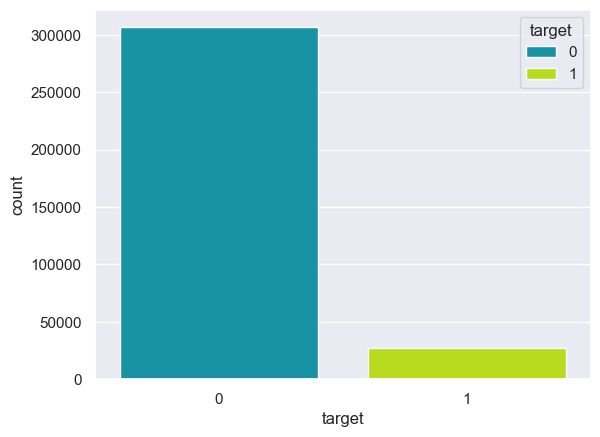

In [164]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

In [165]:
# Get a part of target 0
# Split the data frame based on targets values
df_target_1 = df[df['target']==1]
df_target_0 = df[df['target']==0]

In [166]:
type(df_target_1)

pandas.core.frame.DataFrame

In [167]:
# Shuffle data frame with target 0
df_target_0 = df_target_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)


In [168]:
# Get 40K rows from the data frame with target 0
df_target_0 = df_target_0.iloc[:40000, :]

In [169]:
type(df_target_0)

pandas.core.frame.DataFrame

In [170]:
# Combine the reduced targets 0 with the targets 1
df = pd.concat([df_target_0, df_target_1],ignore_index=True)

In [171]:
# Split the training columns from the columns with the targets
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[(0, 40000), (1, 27324)]


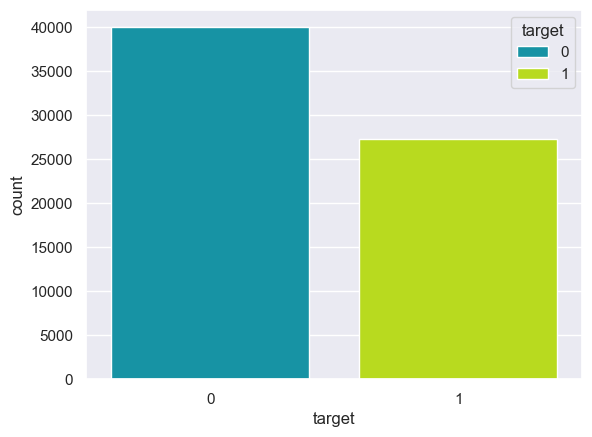

In [172]:
# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

[(0, 40000), (1, 40000)]


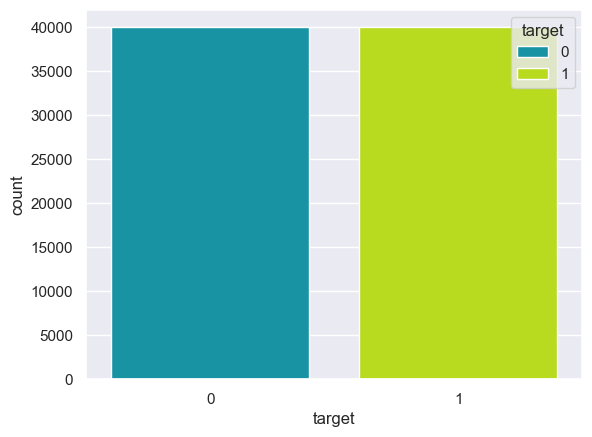

In [173]:
from imblearn.over_sampling import SMOTE

# Balance targets with Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

# Illustrate the balance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y,palette='nipy_spectral')
plt.show()

In [174]:
# Restore the data set for the classification task 
df = X.join(y)

# Display df
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (80000, 60)


,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,321.4,47.4,23.0,24,0,3,4,1,12.0379,12.0396,19.689405,19.669683,8.9510,8.9510,20.189036,20.131043,1.579800e-18,8.882032e-10,11.8549,13.8613,19.828549,19.784878,6.8130,8.7257,19.009399,19.425767,3.3144,4.8103,19.794903,20.161260,32.955953,20.043709,20.031314,20.001367,0.44,0.44,0.05,0.00,0.07,0.0,0.0,0.00,71.01,5.96,9.96,0.00,13.08,0.0,0.0,0.00,21.344866,21.345056,1.740041,1.588560,3.576786,2.881587,2.055576,1.813962,20.043,0
1,435.5,96.6,22.0,30,1,8,6,1,10.1699,10.1699,20.577335,20.804413,16.4968,17.6968,20.085994,20.287427,1.954322e-01,1.524441e-04,14.9862,17.0048,20.014981,19.996335,4.4574,6.4044,19.238583,19.711166,3.9405,5.5638,19.860660,20.122260,40.703337,20.036582,20.041089,20.002774,0.38,0.42,0.10,0.02,0.06,0.0,0.0,0.02,55.16,5.09,18.37,7.36,9.65,0.0,0.0,4.36,20.616477,20.574675,3.362094,2.655175,3.803121,3.056328,1.131176,1.151084,20.044,0
2,326.4,35.5,23.5,24,0,4,4,1,14.0236,14.0253,19.909346,20.021615,6.4515,7.6587,20.127747,20.460638,2.025753e-01,1.029795e-05,13.4760,15.2977,19.938001,19.885100,5.5706,7.5059,19.467285,19.438197,2.5476,4.3036,19.574432,19.749085,38.326515,20.116229,20.047199,20.053929,0.47,0.44,0.07,0.00,0.00,0.0,0.0,0.02,73.60,5.87,14.71,0.00,0.00,0.0,0.0,5.82,22.173696,21.831290,2.419129,2.038090,5.289684,3.554629,2.186607,1.744098,20.064,0
3,328.4,131.0,22.7,22,2,7,10,1,8.1808,8.2875,19.690349,19.983015,6.0252,6.9069,20.178932,20.036360,3.212003e-02,1.028869e-03,6.2964,9.9267,20.714875,20.711337,7.7898,9.4391,19.910619,19.999974,5.7142,7.5019,19.691513,19.673495,114.570717,20.932503,21.160313,20.042273,0.33,0.52,0.09,0.02,0.04,0.0,0.0,0.00,54.86,7.37,19.49,9.76,8.53,0.0,0.0,0.00,21.357764,21.199887,0.808288,1.051657,1.101887,1.323225,1.363235,1.258228,20.083,0
4,368.5,50.8,24.5,27,1,4,7,1,8.8334,8.8334,20.833796,20.750801,11.8538,11.8538,20.404210,20.577018,0.000000e+00,8.121539e-07,11.8621,13.9336,20.418925,20.489784,8.0705,9.7994,19.347410,19.744806,3.0056,4.9817,19.596886,19.647192,50.087281,20.024830,20.097086,20.021630,0.40,0.51,0.05,0.00,0.04,0.0,0.0,0.00,71.71,7.66,13.03,0.00,7.60,0.0,0.0,0.00,20.745196,20.745196,1.469810,1.421883,3.946666,2.796957,2.685154,1.967080,20.056,0


[<a href="#content">Back to top</a>]

### Creating csv files for the classification task <a name="28"></a>

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MW                  80000 non-null  float64
 1   TPSA                80000 non-null  float64
 2   XL                  80000 non-null  float64
 3   HAC                 80000 non-null  int64  
 4   HBDC                80000 non-null  int64  
 5   HBAC                80000 non-null  int64  
 6   RBC                 80000 non-null  int64  
 7   CBUC                80000 non-null  int64  
 8   MMX6                80000 non-null  float64
 9   MMX                 80000 non-null  float64
 10  SX6                 80000 non-null  float64
 11  SX                  80000 non-null  float64
 12  MMY6                80000 non-null  float64
 13  MMY                 80000 non-null  float64
 14  SY6                 80000 non-null  float64
 15  SY                  80000 non-null  float64
 16  Volu

In [176]:
df.describe(include="all")

,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,364.328895,88.403125,23.030279,25.380875,1.153650,5.045375,4.896700,1.0,10.788768,11.302231,20.027918,20.026361,9.330245,9.841825,19.975148,19.992661,5.786449,0.033290,11.409605,13.376040,20.004195,20.005384,5.703859,7.653866,19.996436,19.997886,3.023202,4.834027,20.000101,19.999376,57.242918,20.315334,20.405889,20.396657,0.413457,0.425558,0.066192,0.015187,0.068669,0.001318,0.004607,0.004825,60.908565,5.364116,12.752890,5.551079,11.583234,1.001894,1.757141,1.078937,21.379160,21.319929,2.242055,1.845131,84.923331,24.002913,41.264759,15.583500,20.057546,0.500000
std,78.332666,32.569584,1.271355,5.540248,0.893953,1.804379,2.248692,0.0,3.650870,3.576236,0.307633,0.283310,3.634944,3.528586,0.371698,0.325190,195.679342,0.571091,2.803674,2.750978,0.313767,0.282749,1.825208,1.741233,0.444334,0.322584,1.283235,1.380887,0.540332,0.335901,71.725541,1.076695,5.586164,5.511120,0.042848,0.057797,0.036318,0.018326,0.034563,0.006699,0.012700,0.016658,8.484565,1.349450,6.630072,6.333185,5.459371,4.667369,4.529736,3.515275,0.849006,0.692674,1.025890,0.595334,843.936233,391.778640,484.327314,280.539356,0.016622,0.500003
min,70.090000,0.000000,11.800000,5.000000,0.000000,0.000000,0.000000,1.0,0.412500,1.334900,18.442165,18.786557,0.375000,0.412500,18.445190,18.725315,0.000000,0.000000,0.499900,3.694800,18.534780,18.799084,0.131600,2.221400,17.566934,18.590198,0.000100,0.000300,16.273016,14.612511,0.000000,20.000012,20.000000,20.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.096262,20.142857,0.198846,0.691939,0.596586,0.605246,0.118154,0.601724,20.000000,0.000000
25%,309.320000,66.100000,22.200000,21.000000,1.000000,4.000000,3.000000,1.0,8.125800,8.822000,19.832646,19.842528,6.720982,7.310100,19.729063,19.772760,0.000000,0.000002,9.401328,11.401275,19.809074,19.820495,4.372675,6.356400,19.716955,19.798356,2.348375,4.136527,19.727900,19.836189,25.889037,20.047907,20.042693,20.041320,0.385072,0.390000,0.040000,0.000000,0.048578,0.000000,0.000000,0.000000,55.460000,4.440000,8.240000,0.000000,7.900000,0.000000,0.000000,0.000000,20.818478,20.832661,1.511956,1.395855,2.857951,2.203915,1.446568,1.306235,20.049000,0.000000
50%,363.400000,85.800000,23.097996,25.000000,1.000000,5.000000,5.000000,1.0,10.392650,11.123653,20.019393,20.017699,9.092827,9.623600,19.977218,19.994767,0.062961,0.000149,11.199300,13.176900,20.000395,20.003553,5.647001,7.554550,19.998589,19.998968,2.876850,4.811331,20.000136,20.000088,40.028498,20.115333,20.101094,20.100661,0.410000,0.430000,0.060000,0.012778,0.060000,0.000000,0.000000,0.000000,61.250000,5.300000,12.580000,6.040000,11.020000,0.000000,0.000000,0.000000,21.159628,21.154658,1.976856,1.7220

In [177]:
# Shuffle the resulted dataset
df = df.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

In [178]:
# Create a csv file for the classification task
df.to_csv('data_classification_smote.csv')  # save a copy as static_data_classification_smote.csv

[<a href="#content">Back to top</a>]